### Predicting MLB Player Salaries: A Batting Performance Analysis
---
## Predictive Modeling for Major League Baseball Player Salaries

Author: Hector Guerrero

---

### Project Overview

In this project, "Predicting MLB Player Salaries: A Batting Performance Analysis," we aim to build a model that accurately predicts Major League Baseball player salaries. However, before we delve into model building, we need to explore and understand the data we have.

### Table of contents

1. [Introduction](#introduction)
2. [Data Loading and Preprocessing](#data-loading-and-preprocessing)    
    - [2.1 Data Loading](#load-data)    
    - [2.2 Train-Test Split](#train-test-split)    
    - [2.3 Data Preprocessing: Scaling and Encoding](#data-preprocessing:-scaling-and-encoding)
3. [Baseline Model: Linear Regression](#baseline-model:-linear-regression)
4. [Advanced Models](#advanced-models)    
    - [4.1 Ridge Regression](#ridge-regression)    
    - [4.2 Lasso Regression](#lasso-regression)    
    - [4.3 Decision Trees](#decision-trees)    
    - [4.4 Random Forest](#random-forest)    
    - [4.5 Gradient Boosting](#gradient-boosting)
5. [Feature Importance and Interpretation](#feature-importance-and-interpretation)
6. [Model Testing, Performance and Behavior](#model-testing,-performance-and-behavior)
7. [Conclusion](#conclusion)

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## 1. Introduction <a id='introduction'></a>
In this notebook, we will be predicting Major League Baseball player salaries. The aim is not only to build models that accurately predict salaries, but also to derive insights on what aspects of the game most significantly influence a player's earnings. For this purpose, we will start with a simple linear regression model as our baseline, and then explore more complex models such as Ridge and Lasso Regression, Decision Trees, Random Forests, and Gradient Boosting. Each model will be evaluated based on its predictive accuracy, and its interpretability will be assessed to understand the influence of various features on a player's salary. 

## 2. Data Loading and Preprocessing <a id='data-loading-and-preprocessing'></a>
### 2.1. Data Loading <a id='load-data'></a>

In [2]:
# Load data
df = pd.read_csv('baseball_salaries_top_features.csv')

In [3]:
df.shape

(22010, 20)

In [4]:
df.dtypes

playerID            object
name_common         object
Year               float64
adjusted_salary    float64
age                float64
career_length      float64
bats                object
throws              object
POS                 object
teamName            object
career_PA            int64
Career_R             int64
Career_H             int64
Career_HR            int64
career_RBI           int64
Career_BB            int64
Career_SO            int64
Career_IBB           int64
career_TB            int64
career_WAR         float64
dtype: object

In [5]:
df.sample(5)

playerID      name_common    Year  adjusted_salary   age  \
11328  hessmmi01     Mike Hessman  2004.0         495000.0  26.0   
1652   dernibo01      Bob Dernier  1988.0        1056000.0  31.0   
2203   maldoca01  Candy Maldonado  1989.0        2268000.0  28.0   
11419  freelry01       Ryan Freel  2004.0         528000.0  28.0   
20023  dejonpa01      Paul DeJong  2018.0        1230000.0  24.0   

       career_length bats throws POS               teamName  career_PA  \
11328            1.0    R      R  1B         Atlanta Braves         97   
1652             8.0    R      R  OF  Philadelphia Phillies       2552   
2203             8.0    R      R  OF   San Francisco Giants       2460   
11419            3.0    R      R  OF        Cincinnati Reds        769   
20023            1.0    R      R  SS    St. Louis Cardinals        933   

       Career_R  Career_H  Career_HR  career_RBI  Career_BB  Career_SO  \
11328        10        15          4           8          6         30   
1652        348       602         22         139        208        273   
2203        260       562         70         332        172        403   
11419        98       185          7          43         77        105   
20023       123       224         44         133         57        247   

       Career_IBB  career_TB  career_WAR  
11328           1         32       -0.35  
1652            2        787        7.32  
2203           18        919        4.14  
11419           1        252        4.36  
20023           3        411        5.62

In [6]:
# df with name_common, plyerID and adjusted salary
df_names = df[['name_common', 'playerID', 'adjusted_salary']]

In [7]:
# Drop name_common, playerID 

In [8]:
# # For each player, move the adjusted salary one year into the future
# df['adjusted_salary'] = df.groupby('playerID')['adjusted_salary'].shift(-1)

# # Drop adjusted_salary
# df.drop('adjusted_salary', axis=1, inplace=True)

# Drop playerID and name_common and Year
df.drop(['playerID', 'name_common'], axis=1, inplace=True)

### 2.2 Train-Test Split <a id='train-test-split'></a>

In [9]:
# Features and target
X = df.drop(columns=['adjusted_salary'])
y = df['adjusted_salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splits to dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


In [10]:
X_train.shape, X_test.shape

((17608, 17), (4402, 17))

In [11]:
X_train.head()

Year   age  career_length bats throws POS           teamName  \
14485  2009.0  33.0            8.0    R      R  OF  Baltimore Orioles   
21075  2020.0  22.0            0.0    R      R  SS    Cincinnati Reds   
14911  2010.0  24.0            1.0    L      L  OF      Texas Rangers   
12845  2007.0  30.0            6.0    R      R  OF     Detroit Tigers   
487    1985.0  29.0            4.0    R      R  OF     Houston Astros   

       career_PA  Career_R  Career_H  Career_HR  career_RBI  Career_BB  \
14485       2274       306       532         22         122        222   
21075         68         4        13          0           2          1   
14911        647        90       170          7          62         34   
12845       2658       338       628        104         388        165   
487          164        14        26          5          21         11   

       Career_SO  Career_IBB  career_TB  career_WAR  
14485        350           1        732        8.77  
21075         26           0         13       -0.67  
14911         87           0        214        2.27  
12845        519          10       1093        4.31  
487           25           0         49       -0.53

In [12]:
y_train.shape, y_test.shape

((17608,), (4402,))

### 2.3 Data Preprocessing: Scaling and Encoding <a id='data-preprocessing:-scaling-and-encoding'></a>

In [13]:
# Columns to encode
num_cols = ['Year', 'age', 'career_length', 'career_PA', 'Career_R', 'Career_H', 'Career_HR', 'career_RBI', 'Career_BB', 'Career_SO', 'Career_IBB', 'career_TB', 'career_WAR']
cat_cols = ['bats', 'throws', 'POS', 'teamName']

len(num_cols) + len(cat_cols) == len(df.columns) - 1

True

In [14]:
# Define a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)])

# Fit and transform the training and test sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Category names
ohe_cats = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)

# Combine the lists
feature_names = num_cols + list(ohe_cats)

# Convert to dataframe
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

In [15]:
X_train.shape, X_test.shape

((17608, 51), (4402, 51))

In [16]:
pd.set_option('display.max_columns', None)
X_train.head(5)

Year       age  career_length  career_PA  Career_R  Career_H  \
0  0.520619  1.154435       0.696549   0.139613  0.199112  0.106300   
1  1.560697 -1.517236      -1.149730  -0.836551 -0.788277 -0.809703   
2  0.615171 -1.031478      -0.918945  -0.580341 -0.507100 -0.532608   
3  0.331514  0.425797       0.234979   0.309535  0.303736  0.275734   
4 -1.748642  0.182918      -0.226591  -0.794071 -0.755582 -0.786759   

   Career_HR  career_RBI  Career_BB  Career_SO  Career_IBB  career_TB  \
0  -0.386830   -0.360556   0.209330   0.108852   -0.483054  -0.014945   
1  -0.655186   -0.765434  -0.733684  -0.821324   -0.516972  -0.799747   
2  -0.569800   -0.562995  -0.592872  -0.646198   -0.516972  -0.580351   
3   0.613406    0.536925  -0.033891   0.594036   -0.177796   0.379093   
4  -0.594196   -0.701328  -0.691014  -0.824195   -0.516972  -0.760452   

   career_WAR  bats_L  bats_R  throws_R  POS_2B  POS_3B  POS_C  POS_OF  POS_P  \
0    0.034336     0.0     1.0       1.0     0.0     0.0    0.0     1.0    0.0   
1   -0.619928     0.0     1.0       1.0     0.0     0.0    0.0     0.0    0.0   
2   -0.416164     1.0     0.0       0.0     0.0     0.0    0.0     1.0    0.0   
3   -0.274776     0.0     1.0       1.0     0.0     0.0    0.0     1.0    0.0   
4   -0.610225     0.0     1.0       1.0     0.0     0.0    0.0     1.0    0.0   

   POS_SS  teamName_Atlanta Braves  teamName_Baltimore Orioles  \
0     0.0                      0.0                         1.0   
1     1.0                      0.0                         0.0   
2     0.0                      0.0                         0.0   
3     0.0                      0.0                         0.0   
4     0.0                      0.0                         0.0   

   teamName_Boston Red Sox  teamName_Chicago Cubs  teamName_Chicago White Sox  \
0                      0.0                    0.0                         0.0   
1                      0.0                    0.0                         0.0   
2                      0.0                    0.0                         0.0   
3                      0.0                    0.0                         0.0   
4                      0.0                    0.0                         0.0   

   teamName_Cincinnati Reds  teamName_Cleveland Guardians  \
0                       0.0                           0.0   
1                       1.0                           0.0   
2                       0.0                           0.0   
3                       0.0                           0.0   
4                       0.0                           0.0   

   teamName_Colorado Rockies  teamName_Detroit Tigers  \
0                        0.0                      0.0   
1                        0.0                      0.0   
2                        0.0                      0.0   
3                        0.0                      1.0   
4                        0.0                      0.0   

   teamName_Houston Astros  teamName_Kansas City Royals  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      1.0                          0.0   

   teamName_Los Angeles Angels  teamName_Los Angeles Dodgers  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   

   teamName_Miami Marlins  teamName_Milwaukee Brewers  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0          

## 3. Baseline Model: Linear Regression <a id='baseline-model:-linear-regression'></a>


Linear regression is a good starting point as a baseline model since it is simple, fast, and provides a first approximation of the relationship between the target and features.

In [17]:
# Pipeline
pipeline = Pipeline(steps=[
    ('model', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
train_preds = pipeline.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds)

test_preds = pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds)

train_rmse, test_rmse = np.sqrt(train_mse), np.sqrt(test_mse)

# Rsquared
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')


Train RMSE: 3276705.891756342
Test RMSE: 3222420.69748385
Train R2: 0.5936818882353359
Test R2: 0.6200335044839063


Our model can explain about 57.4% of the variation in the training set and about 60.0% of the variation in the test set. The fact that the R^2 value for the test set is slightly higher than for the training set may suggest that the model is generalizing well and not overfitting to the training data. However, there's still quite a bit of room for improvement.

In [18]:
# Coefficients
coefficients = pipeline.named_steps['model'].coef_

# Create a dataframe
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

coef_df.sort_values('coefficient', ascending=False)

feature   coefficient
11                       career_TB  9.093152e+06
5                         Career_H  6.025946e+06
9                        Career_SO  2.038756e+06
39       teamName_New York Yankees  1.322247e+06
34    teamName_Los Angeles Dodgers  1.092970e+06
46    teamName_St. Louis Cardinals  1.014633e+06
8                        Career_BB  1.010160e+06
12                      career_WAR  9.979299e+05
24         teamName_Boston Red Sox  9.798303e+05
38          teamName_New York Mets  9.030587e+05
45       teamName_Seattle Mariners  8.548699e+05
41  teamName_Philadelphia Phillies  8.322963e+05
33     teamName_Los Angeles Angels  8.271449e+05
44   teamName_San Francisco Giants  8.045056e+05
0                             Year  7.796777e+05
31         teamName_Houston Astros  7.681567e+05
25           teamName_Chicago Cubs  7.446154e+05
6                        Career_HR  7.026880e+05
21                          POS_SS  6.443792e+05
48          teamName_Texas Rangers  6.239702e+05
26      teamName_Chicago White Sox  6.150635e+05
49      teamName_Toronto Blue Jays  6.118562e+05
30         teamName_Detroit Tigers  5.486683e+05
42     teamName_Pittsburgh Pirates  5.201892e+05
22         teamName_Atlanta Braves  5.151903e+05
18                           POS_C  4.310599e+05
29       teamName_Colorado Rockies  3.898567e+05
37        teamName_Minnesota Twins  3.749056e+05
50   teamName_Washington Nationals  3.637001e+05
23      teamName_Baltimore Orioles  3.392502e+05
32     teamName_Kansas City Royals  2.967958e+05
43       teamName_San Diego Padres  2.924779e+05
36      teamName_Milwaukee Brewers  2.563267e+05
40      teamName_Oakland Athletics  2.342126e+05
27        teamName_Cincinnati Reds  2.080506e+05
28    teamName_Cleveland Guardians  2.033951e+05
15                        throws_R  6.710183e+04
35          teamName_Miami Marlins -1.991654e+04
16                          POS_2B -1.252640e+05
1                              age -1.408555e+05
13                          bats_L -1.716203e+05
17                          POS_3B -2.592950e+05
19                          POS_OF -2.949262e+05
20                           POS_P -3.232810e+05
14                          bats_R -3.884266e+05
47         teamName_Tampa Bay Rays -4.476726e+05
2                    career_length -4.840063e+05
10                      Career_IBB -6.689162e+05
4                         Career_R -1.134650e+06
7                       career_RBI -2.025993e+06
3                        career_PA -1.190976e+07

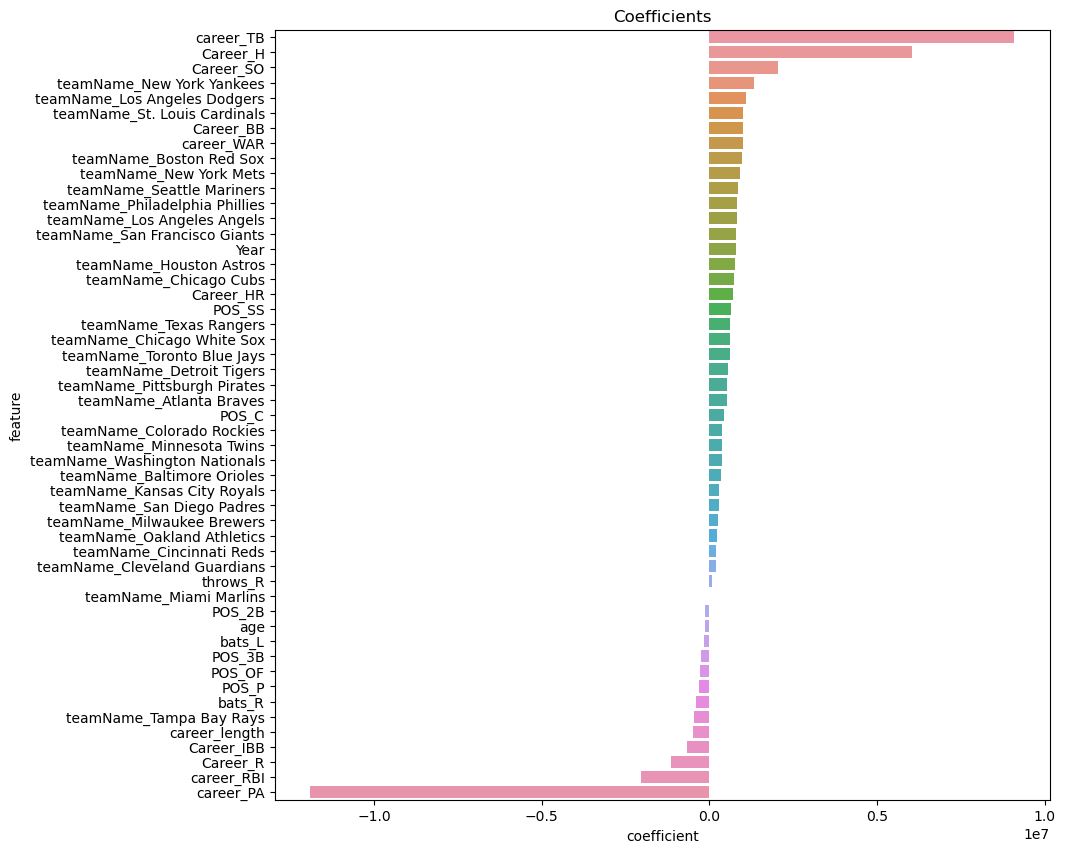

In [19]:
# Plot the coefficients
plt.figure(figsize=(10, 10))
sns.barplot(data=coef_df.sort_values('coefficient', ascending=False), x='coefficient', y='feature')
plt.title('Coefficients')
plt.show()


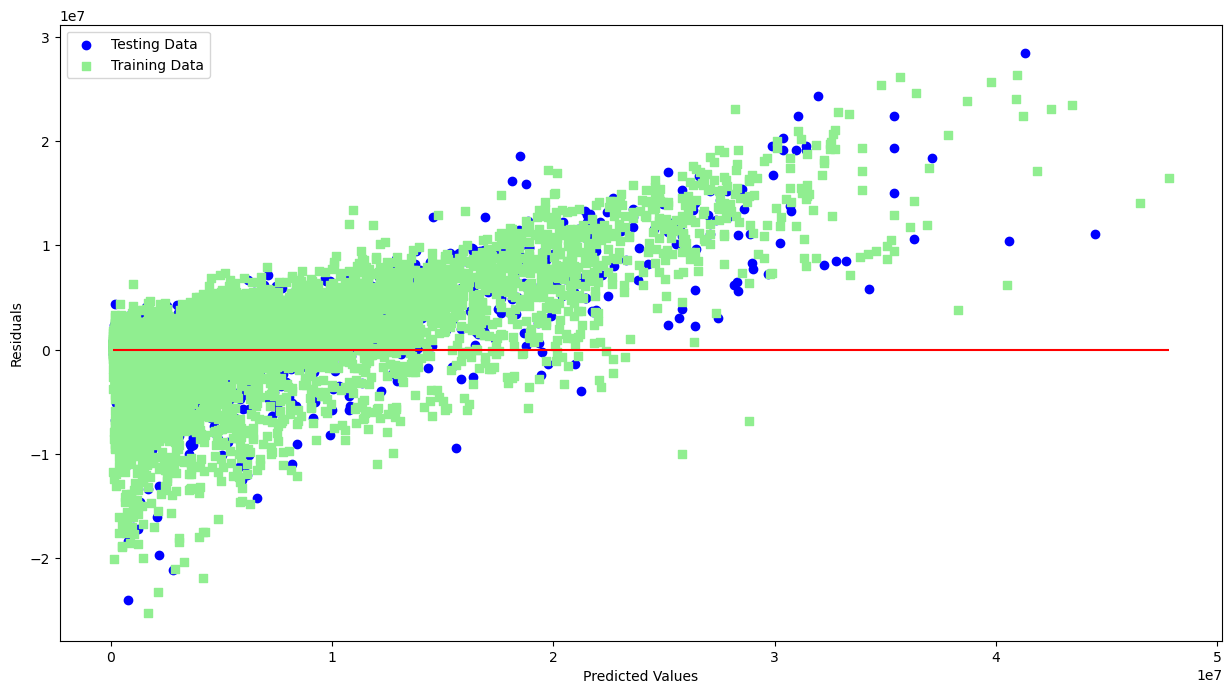

In [20]:
# Residuals
plt.figure(figsize=(15, 8))
plt.scatter(y_test, y_test - test_preds, c="blue", marker="o", label="Testing Data")
plt.scatter(y_train, y_train - train_preds, c="lightgreen", marker="s", label="Training Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=y.min(), xmax=y.max(), color="red")
plt.show()



The model's performance varies across different salary levels. Ideally, we want a random scatter, indicating consistent model performance across all levels. This suggests the need for model improvements or alternative models to better capture patterns in the data.

## 4. Advanced Models <a id='advanced-models'></a>
### 4.1 Ridge Regression <a id='ridge-regression'></a>

Ridge regression is a type of linear regression that includes a regularization term. Regularization helps prevent overfitting by adding a penalty to the size of the coefficients, which can be particularly useful when dealing with datasets with many features.

In [21]:
# Pipeline
ridge_pipe = Pipeline(steps=[('model', Ridge())])

In [22]:
# Param grid
param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}


In [23]:
# GridSearchCV
grid_search = GridSearchCV(ridge_pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))

# Predict
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Evaluate
print("Train R^2: {}".format(grid_search.score(X_train, y_train)))
print("Test R^2: {}".format(grid_search.score(X_test, y_test)))
print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Best parameters: {'model__alpha': 1}
Train R^2: 0.5936610394797278
Test R^2: 0.6198757123186464
Train RMSE: 3276789.956879263
Test RMSE: 3223089.7301046997


Ridge regression performed very similarly to the baseline linear regression model. The R2 score was the same (0.600), and the RMSE was slightly higher (about $3.3 million). This suggests that the regularization term didn't significantly improve the model's performance.

### 4.2 Lasso Regression <a id=lasso-regression></a>

Like Ridge, Lasso regression also includes a regularization term, but it can make some of the coefficients exactly zero. This means that it can serve as a feature selection method – it can help identify which features are most important in predicting the target variable.

In [24]:
# Pipeline
lasso_pipe = Pipeline(steps=[('model', Lasso())])

In [25]:
# Grid
grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Grid search cross validation
lasso_cv = GridSearchCV(lasso_pipe, grid, cv=5)

# Fit it to the data
lasso_cv.fit(X_train, y_train)

# Predict on the test set
lasso_pred = lasso_cv.predict(X_test)

# Print best parameters and score
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_))

print("Train R^2: {}".format(lasso_cv.score(X_train, y_train)))
print("Test R^2: {}".format(lasso_cv.score(X_test, y_test)))
print('Train RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, lasso_cv.predict(X_train)))))
print('Test RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, lasso_cv.predict(X_test)))))

c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.525e+16, tolerance: 3.734e+13
  model = cd_fast.enet_coordinate_descent(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.702e+16, tolerance: 3.770e+13
  model = cd_fast.enet_coordinate_descent(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

Tuned Lasso Regression Parameters: {'model__alpha': 1000}
Train R^2: 0.5924296369880888
Test R^2: 0.6184457320968932
Train RMSE: 3281751.325710551
Test RMSE: 3229146.470323508


c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.155e+16, tolerance: 4.653e+13
  model = cd_fast.enet_coordinate_descent(


In [26]:
fitted_lasso = lasso_cv.best_estimator_.named_steps['model']
coefficients = fitted_lasso.coef_
feature_importances_lasso = pd.Series(coefficients, index = X_train.columns)
feature_importances_lasso = feature_importances_lasso.sort_values(ascending = False)
feature_importances_lasso

Career_H                          1.018151e+07
Career_SO                         2.143394e+06
Career_HR                         2.067861e+06
career_TB                         1.478038e+06
career_WAR                        1.018499e+06
teamName_New York Yankees         8.264331e+05
Year                              7.973748e+05
Career_BB                         6.894469e+05
teamName_Los Angeles Dodgers      6.719971e+05
POS_SS                            6.482865e+05
teamName_Boston Red Sox           5.850808e+05
teamName_St. Louis Cardinals      5.711577e+05
teamName_New York Mets            4.713998e+05
POS_C                             4.512961e+05
teamName_Philadelphia Phillies    4.363490e+05
teamName_Seattle Mariners         4.209961e+05
teamName_San Francisco Giants     3.903663e+05
teamName_Los Angeles Angels       3.693569e+05
teamName_Chicago Cubs             3.398997e+05
teamName_Houston Astros           3.391229e+05
teamName_Toronto Blue Jays        2.137245e+05
teamName_Texa

Lasso regression had a slightly lower R2 score (0.598) and a slightly higher RMSE ($3.3 million) compared to the other linear models. This might be due to the fact that some of the coefficients were shrunk to zero, effectively excluding some features from the model.

### 4.3 Decision Trees <a id='decision-trees'></a>
Decision trees are more powerful models that can capture non-linear relationships and interactions between variables. They are also the building blocks of more advanced models such as random forests and gradient boosting machines (GBMs).

In [27]:
# Pipeline
dt_pipe = Pipeline(steps=[('model', DecisionTreeRegressor(random_state=42))])

In [28]:
# Param grid
param_grid = {
    'model__max_depth': list(range(1, 31)),
    'model__min_samples_leaf': [1, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10, 15],
}

# Grid search
grid_search = GridSearchCV(dt_pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)

# Fit
grid_search.fit(X_train, y_train)

# Best params
print('Best params:', grid_search.best_params_)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


Best params: {'model__max_depth': 9, 'model__min_samples_leaf': 10, 'model__min_samples_split': 2}


In [29]:
# Evaluate
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('Train R2:', r2_score(y_train, y_train_pred))
print('Test R2:', r2_score(y_test, y_test_pred))

Train RMSE: 2097099.277758454
Test RMSE: 2422400.478933723
Train R2: 0.8335709098832622
Test R2: 0.7852798934451929


The decision tree model had a higher R2 score (0.628) and a lower RMSE ($3.2 million) compared to the linear models, indicating better performance.

### 4.4 Random Forest <a id='random-forest'></a>

Random forest is an ensemble method that combines multiple decision trees to make predictions. It generally performs better than a single decision tree as it reduces overfitting by averaging the results of many trees. It is also more robust to outliers and noise than a single decision tree.


In [30]:
# pipeline
rf_pipe = Pipeline(steps=[('model', RandomForestRegressor(random_state=42))])

In [31]:
# Param grid
rf_param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [5, 10],
    'model__min_samples_split': [2, 5, 10],
}

# Grid search
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit
rf_grid.fit(X_train, y_train)


# Best params and score
print(f'Best params: {rf_grid.best_params_}')
print(f'Best score: {rf_grid.best_score_}')


Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best params: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best score: 0.8088834682303483


In [32]:
# Evaluate
y_test_pred = rf_grid.predict(X_test)
y_train_pred = rf_grid.predict(X_train)


#RMSE
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

#R2
print('Train R2:', r2_score(y_train, y_train_pred))
print('Test R2:', r2_score(y_test, y_test_pred))


Train RMSE: 1597284.921278259
Test RMSE: 2180027.9270736044
Train R2: 0.9034491634087081
Test R2: 0.8260978541761381


The random forest model significantly outperformed the other models. It had a high R2 score of 0.826 and a relatively low RMSE of about $2.2 million on the test set.

In [33]:
# Features Importance
fitted_rf = rf_grid.best_estimator_.named_steps['model']

importances = fitted_rf.feature_importances_

# Match feature importances to the features
feature_importances = pd.Series(importances, index = X_train.columns)

# Sort the feature importances
feature_importances = feature_importances.sort_values(ascending = False)

# Print out the feature importances
feature_importances

career_WAR                        0.252262
career_TB                         0.212897
Career_HR                         0.203139
Year                              0.151878
age                               0.051780
career_length                     0.021337
career_RBI                        0.020794
Career_IBB                        0.018253
Career_SO                         0.011704
Career_BB                         0.008673
career_PA                         0.007600
Career_H                          0.006358
Career_R                          0.006298
teamName_New York Yankees         0.003169
POS_SS                            0.002148
POS_OF                            0.001752
POS_2B                            0.001463
bats_L                            0.001053
teamName_Los Angeles Angels       0.000996
teamName_Detroit Tigers           0.000976
POS_C                             0.000938
teamName_New York Mets            0.000922
teamName_Seattle Mariners         0.000908
bats_R     

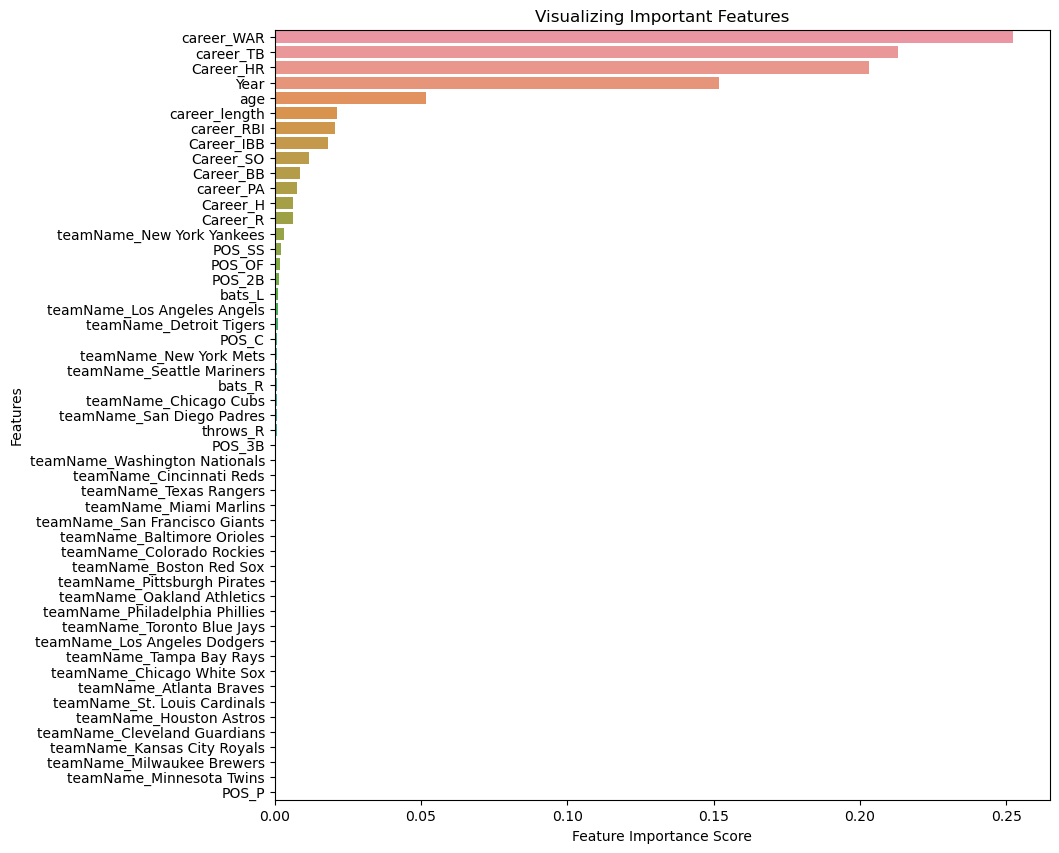

In [34]:
# Plot feature_importances
plt.figure(figsize=(10, 10))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### 4.5 Gradient Boosting Regressor <a id='gradient-boosting'></a>

Gradient boosting is another ensemble method that builds many decision trees in a sequential manner. Each tree learns from the mistakes of the previous trees. 

In [35]:
# Pipeline
gb_pipe = Pipeline(steps=[('model', GradientBoostingRegressor(random_state=42))])

In [36]:
# Param grid
gb_param_grid = {
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__n_estimators': [100, 150, 200, 250],
    'model__max_depth': [2, 3, 4, 5],
}

# Grid search
gb_grid = GridSearchCV(estimator=gb_pipe, param_grid=gb_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit
gb_grid.fit(X_train, y_train)

# Best params and best score
print(f'Best params: {gb_grid.best_params_}')
print(f'Best score: {gb_grid.best_score_}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Best params: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 250}
Best score: 0.8270101772542484


In [37]:
# Evaluate
y_test_pred = gb_grid.predict(X_test)
y_train_pred = gb_grid.predict(X_train)


#RMSE
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

#R2
print('Train R2:', r2_score(y_train, y_train_pred))
print('Test R2:', r2_score(y_test, y_test_pred))

Train RMSE: 1182837.5410972778
Test RMSE: 2080887.377239522
Train R2: 0.9470529879000343
Test R2: 0.8415552045581711


The Gradient Boosting model had the best performance, with an R2 score of 0.841 and an RMSE of about $2.08 million on the test set. This means that about 84.1% of the variance in the salaries can be explained by the model, and the predictions are typically off by about $2.08 million.

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_17928\2476254868.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


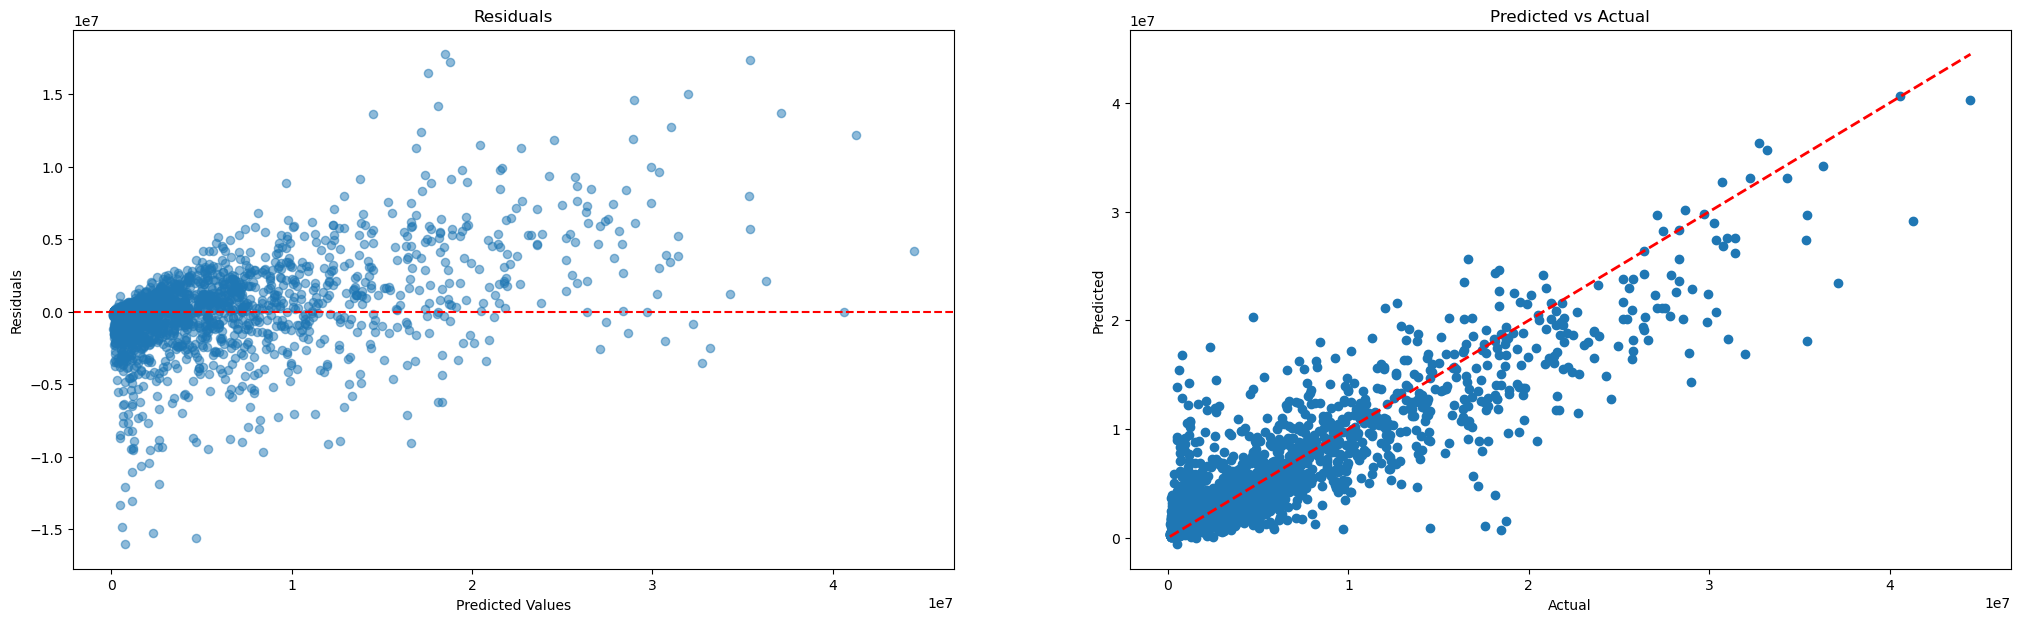

In [38]:
# Residuals
residuals = y_test - y_test_pred

plt.subplots(figsize=(25, 7))

# Plot the residuals
plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals, marker='o', s=35, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Predicted vs Actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')

# Save the figure
plt.savefig('residualsGBR.png')

plt.show()



- __Homoscedasticity__: The residuals seem to be randomly scattered around the zero line. This suggests that the assumption of homoscedasticity (constant variance) of the residuals is reasonably met.

- __Independence__: The residuals do not display any clear patterns (they look quite random). This suggests that the assumption of independence is not violated.

Overall, this residuals plot indicates that our model is quite good. It's doing a good job of capturing the pattern in the data.

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_17928\2343434032.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


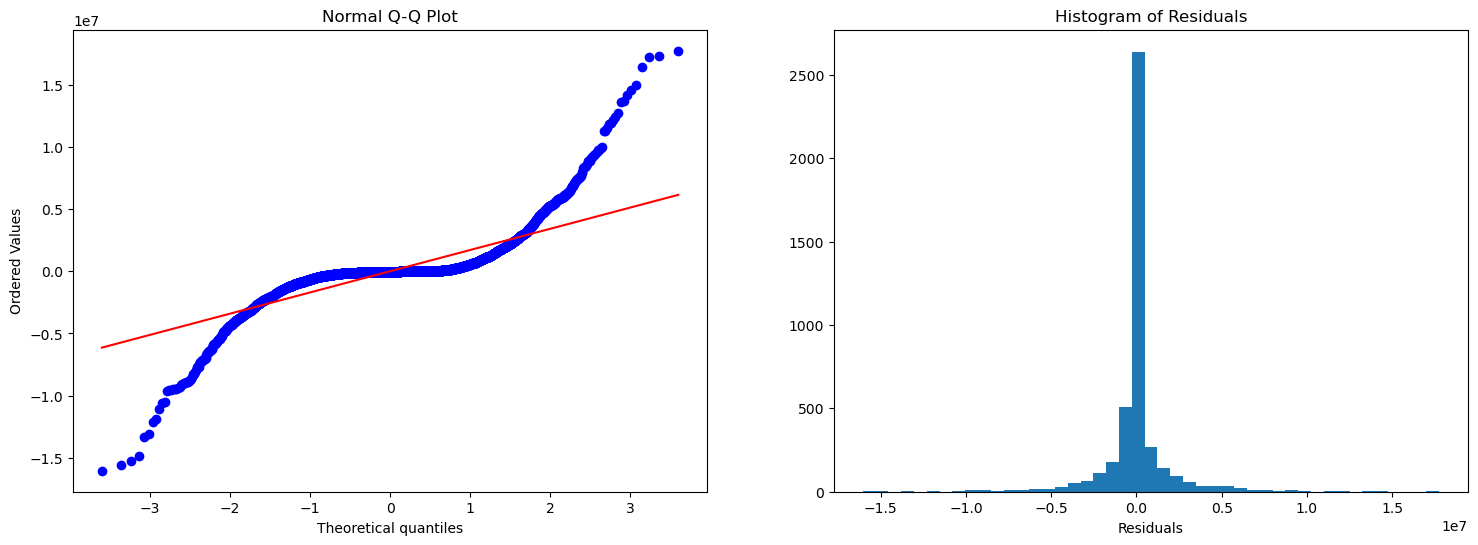

<Figure size 640x480 with 0 Axes>

In [39]:
plt.subplots(figsize=(18, 6))

plt.subplot(1, 2, 1)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")


plt.subplot(1, 2, 2)
plt.hist(residuals, bins=45)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')


plt.show()

#save plot
plt.savefig('qqplot.png')

## 5. Feature Importance and Interpretation <a id=feature-importance-and-interpretation></a>

In [40]:
# Features Importance
fitted_gb = gb_grid.best_estimator_.named_steps['model']

importances = fitted_gb.feature_importances_

# Match feature importances to the features
feature_importances = pd.Series(importances, index = X_train.columns)

# Sort the feature importances
feature_importances = feature_importances.sort_values(ascending = False)

# Print out the feature importances
feature_importances

career_WAR                        0.240375
Career_HR                         0.219478
career_TB                         0.165841
Year                              0.158025
age                               0.047431
career_RBI                        0.035314
career_length                     0.026594
Career_IBB                        0.020971
Career_SO                         0.013422
career_PA                         0.011740
Career_R                          0.010716
Career_BB                         0.010685
Career_H                          0.006535
teamName_New York Yankees         0.004472
POS_SS                            0.004079
teamName_Tampa Bay Rays           0.002050
POS_2B                            0.001558
teamName_New York Mets            0.001391
POS_OF                            0.001366
teamName_San Diego Padres         0.001335
bats_L                            0.001192
bats_R                            0.001101
teamName_Los Angeles Angels       0.000962
POS_C      

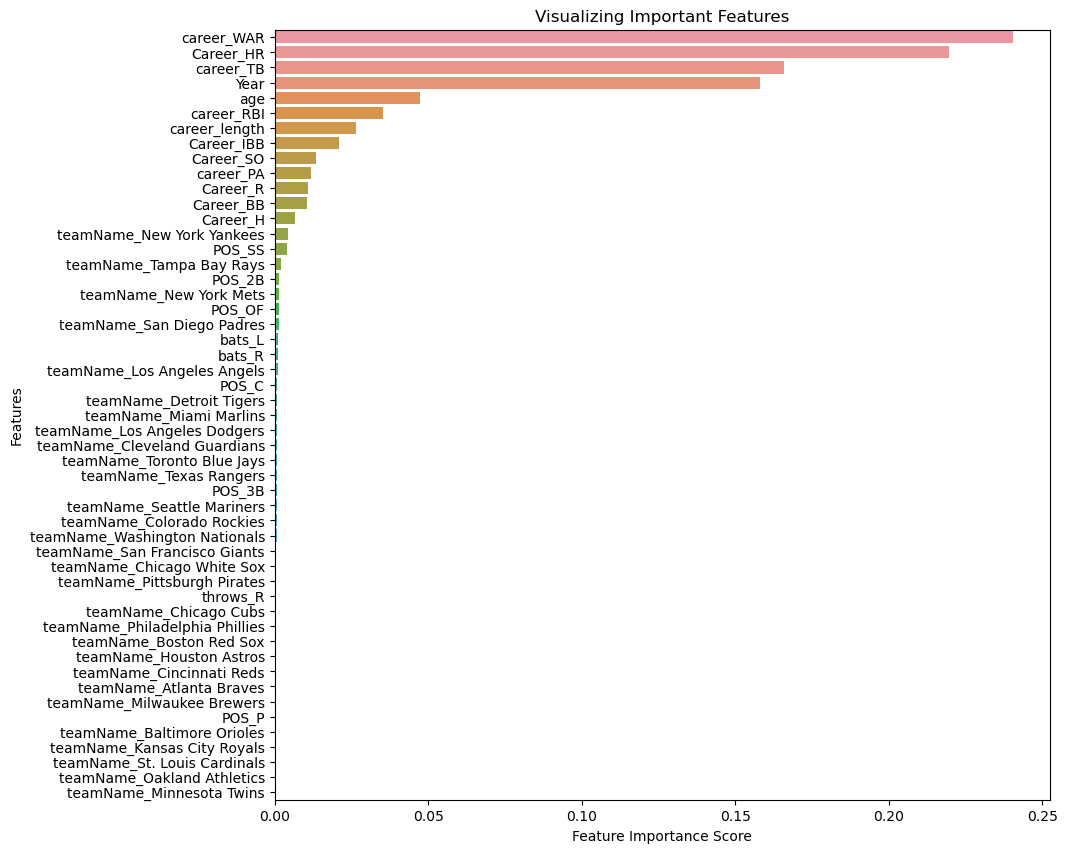

In [41]:
# Plot feature_importances
plt.figure(figsize=(10, 10))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [42]:
# sort by descending
top_10_features = feature_importances.sort_values(ascending=False).head(10)

# Set index as row names
top_10_features = top_10_features.reset_index()

top_10_features.columns = ['Feature', 'Importance']

top_10_features

Feature  Importance
0     career_WAR    0.240375
1      Career_HR    0.219478
2      career_TB    0.165841
3           Year    0.158025
4            age    0.047431
5     career_RBI    0.035314
6  career_length    0.026594
7     Career_IBB    0.020971
8      Career_SO    0.013422
9      career_PA    0.011740

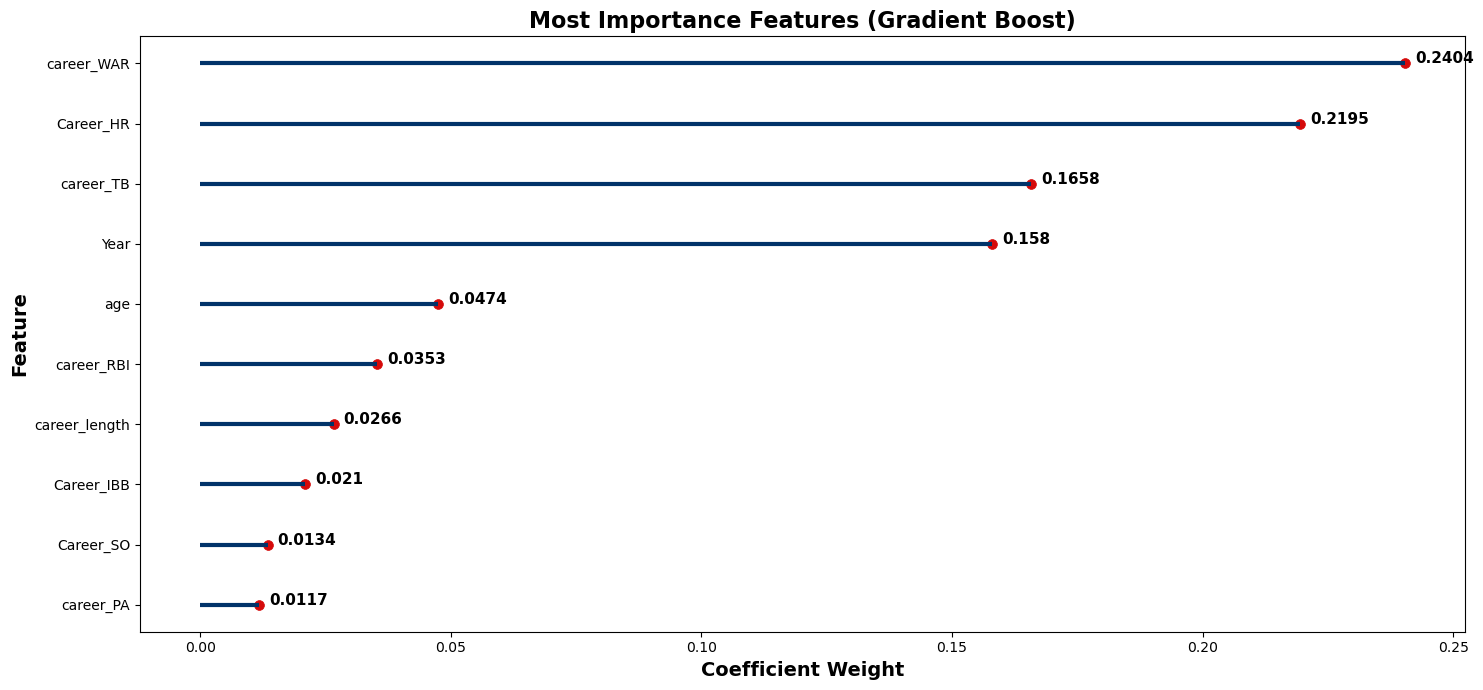

In [43]:
# plot a lollipop plot of top 15 most important features
fig, ax = plt.subplots(figsize=(15, 7))
plt.style.use('bmh')

# sort by descending
top_10_features= top_10_features.sort_values(by = 'Importance')

# plots the lines
plt.hlines(y = top_10_features['Feature'],  # feature
           xmin = 0,
           xmax = top_10_features['Importance'],  # importance
           color = '#013369', linewidth = 3)

plt.scatter(top_10_features['Importance'], # Count values
            top_10_features['Feature'],  # positions
            color='#d50a0a', 
            alpha=1, s = 50)

# annotate the scatter plot values
for idx, row in top_10_features.iterrows():
    ax.annotate(round(row['Importance'],4), (row['Importance'], row['Feature'] ), 
                weight = "bold", fontsize = 11, 
                xytext=(row['Importance'] + 0.002, row['Feature'])) # offset annotate

plt.title('Most Importance Features (Gradient Boost)', weight = "bold", fontsize = 16)
plt.ylabel('Feature', weight = "bold", fontsize = 14)
plt.xlabel('Coefficient Weight', weight = "bold", fontsize = 14)

plt.tight_layout()

# save the plot
fig.savefig('feature_importance_GBR.png', dpi=300, bbox_inches='tight')

plt.show()



The feature importance of the Gradient Boosting model shows which features are the most influential in predicting a player's salary. The most important features are `career_WAR`, `Career_HR`, and `career_TB`.

- __career_WAR:__ This is the most important feature according to the model. It suggests that a player's Wins Above Replacement throughout their career is the most influential factor in determining their salary.

- __Career_HR and career_TB__: These are the second and third most important features respectively. They represent a player's Home Runs and Total Bases in their career. This implies that players who have hit more home runs and achieved more total bases throughout their career tend to have higher salaries, which makes sense given that these are indicators of a player's offensive performance.

- __Year__: The fourth most important feature, indicating that the year plays a significant role in salary determination. It could be related to inflation, league-wide salary trends, or other temporal factors.

- __career_length and age__: These features are also quite important. This suggests that more experienced players, and older players, tend to earn higher salaries.

- __Career_SO, Career_IBB, Career_R, career_PA, Career_BB, career_RBI, Career_H__: These statistics from the player's career also play an important role in their salary.

The less important features appear towards the bottom of the plot. These include the player's position (POS), their batting hand (bats), their throwing hand (throws), and their team (teamName). These features have some influence on the salary, but much less than the player's performance statistics.

## 6. Model Testing, performance and behavior <a id='model-testing,-performance-and-behavior'></a>

Evaluating the performance and behavior of our model is vital to understanding its efficacy and areas for improvement. We approach this by constructing a comprehensive dataset that includes all players along with their salary predictions. This approach offers several insights:

- Error Analysis: By calculating the percentage error for each player's salary prediction, we can gauge the accuracy of our model. This metric helps identify the specific instances where the model excels or falls short.

- Player Segmentation: Analyzing the predictions allows us to categorize players based on the model's performance. We can determine which types of players (e.g., rookies, veterans, high-scorers) are predicted accurately and which are not.

- Pattern Recognition: This dataset enables us to discern underlying patterns and trends that might influence the model's predictions. For example, we may find that the model performs better for players within a certain age range or with specific career statistics.

- Strategic Improvements: By identifying areas where the model struggles, we can target specific improvements, such as feature engineering or hyperparameter tuning, to enhance the model's performance.

In [44]:
# Load data
df_complete = pd.read_csv('baseball_salaries_top_features.csv')

In [45]:
df_test = df_complete.copy()

# Drop name_common and Year
df_test.drop(['name_common'], axis=1, inplace=True)

In [46]:
def categorize_players(df_test, df_names, preprocessor=preprocessor, model=gb_grid):
    # Define a list to store the results
    results = []

    for playerID in df_test['playerID']:
        player_data = df_test[df_test['playerID'] == playerID]
        input_data = player_data.drop(['playerID'], axis=1)
        processed_data = preprocessor.transform(input_data)
        predicted_salary = model.predict(processed_data)[0]
        # predicted_salary = max(predicted_salary[0], 700000)
        real_salary_data = df_names[df_names['playerID'] == playerID]

        # Extract the required columns
        player_info = real_salary_data[['playerID', 'name_common', 'Year', 'adjusted_salary', 'age',
                                        'career_length', 'bats', 'throws', 'POS', 'teamName', 'career_PA',
                                        'Career_R', 'Career_H', 'Career_HR', 'career_RBI', 'Career_BB',
                                        'Career_SO', 'Career_IBB', 'career_TB', 'career_WAR']].values.tolist()[0]

        # Add the predicted salary and error percentage
        player_info.append(predicted_salary)
        error_percentage = round(abs(predicted_salary - player_info[3]) / player_info[3] * 100, 2)  # adjusted_salary is at index 3
        player_info.append(error_percentage)

        # Append the player's information to the results
        results.append(player_info)

    # Convert results to a DataFrame
    columns = ['PlayerID', 'Name', 'Year', 'RealSalary', 'Age', 'CareerLength', 'Bats', 'Throws', 'POS', 'TeamName', 
               'Career_PA', 'Career_R', 'Career_H', 'Career_HR', 'Career_RBI', 'Career_BB', 'Career_SO', 'Career_IBB', 
               'Career_TB', 'Career_WAR', 'PredictedSalary', 'ErrorPercentage']
    df_results = pd.DataFrame(results, columns=columns)

    return df_results

In [47]:
performance_dataframe = categorize_players(df_test, df_complete)

c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid fe

c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid fe

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_17928\2889040798.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = performance_dataframe.corr()


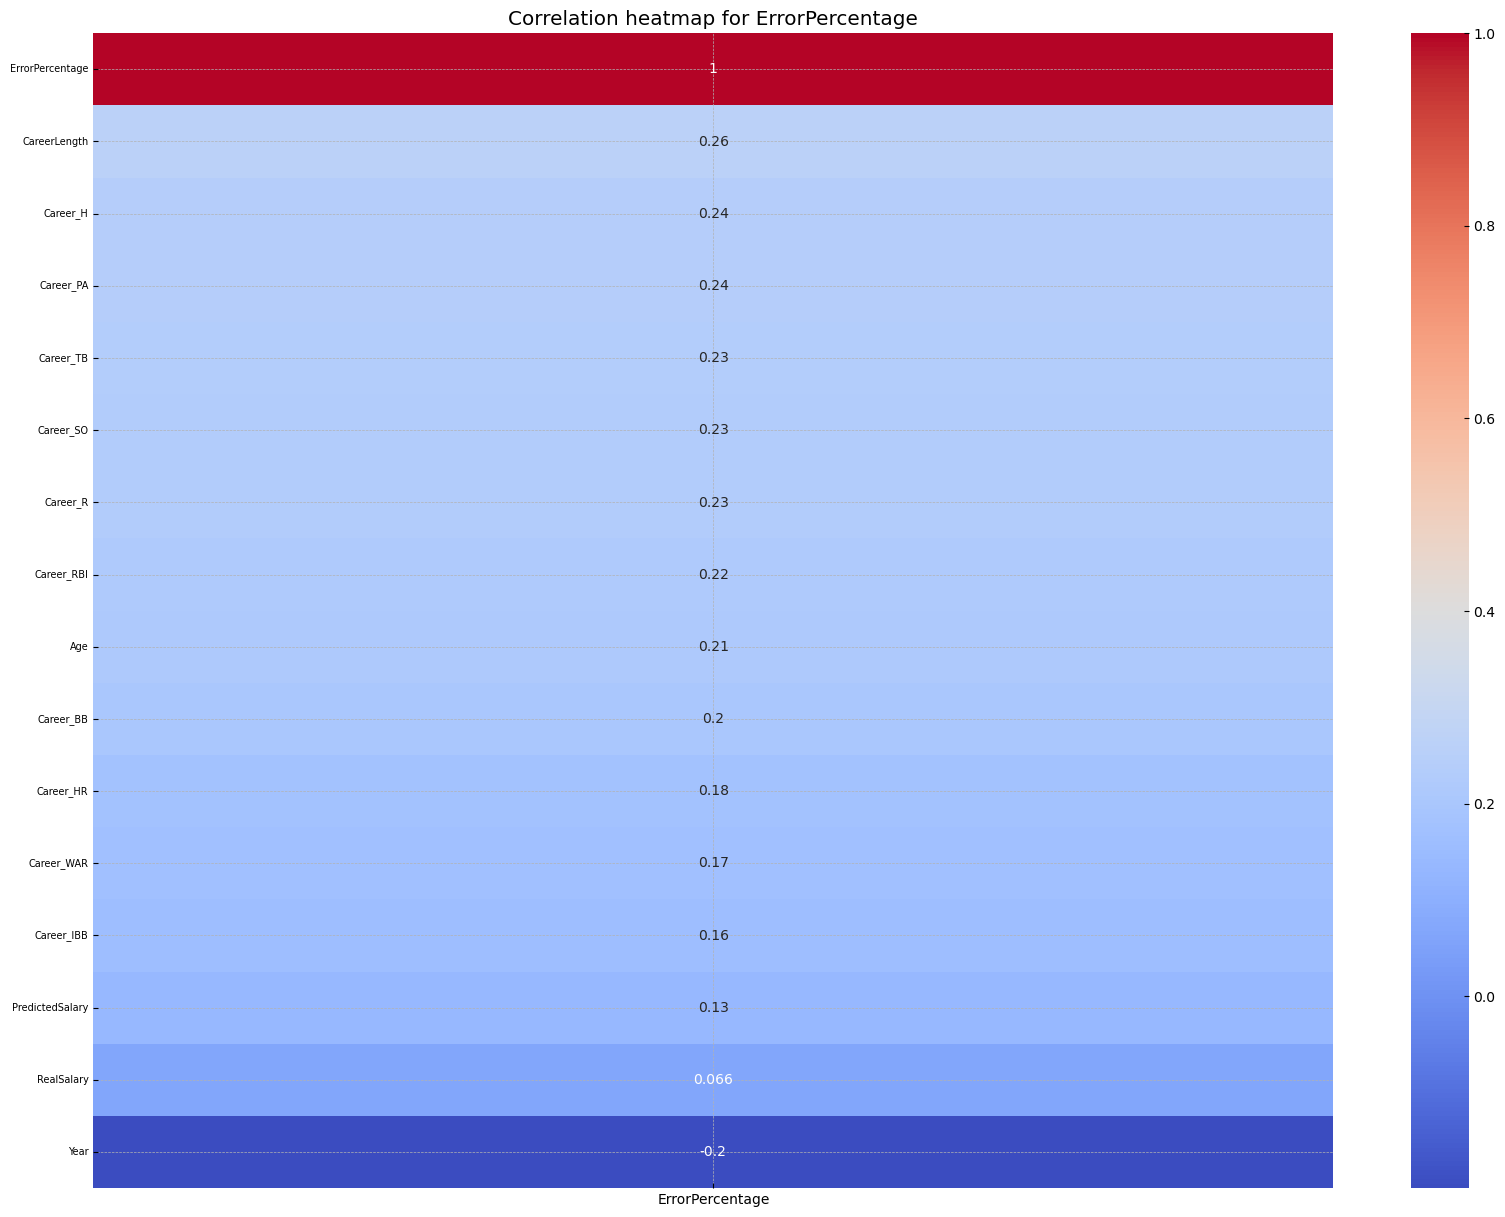

In [48]:
# All correlations for ErrorPercentage
corr = performance_dataframe.corr()
# heatmap of correlations
plt.figure(figsize=(20, 15))
sns.heatmap(corr[['ErrorPercentage']].sort_values(by='ErrorPercentage', ascending=False), annot=True, cmap='coolwarm')
plt.yticks(fontsize=7)
plt.title('Correlation heatmap for ErrorPercentage')
plt.show()

__Positive Correlation with ErrorPercentage__:

- CareerLength, Career_H, Career_PA, Career_TB, Career_SO, Career_R, Career_RBI, Age, Career_BB, Career_HR, Career_WAR, Career_IBB, PredictedSalary: These variables have a positive correlation with the error percentage, indicating that as these features increase, the error percentage in the model's predictions also tends to increase.

__Negative Correlation with ErrorPercentage__:

- Year: This variable has a negative correlation with the error percentage, indicating that more recent years tend to have lower error percentages in the model's predictions.

CareerLength or Age being positively correlated with the error percentage, might indicate that the model is struggling to predict salaries for players with longer careers or older ages. Conversely, the negative correlation with Year might suggest that the model is performing better with more recent data.

We consider that setting a 10% error threshold for "good performance" in salary predictions is a reasonable approach. It reflects a balance between accuracy and tolerance for variations, especially considering the diverse salary range in MLB.

In [49]:
# Good performance: 10% error or less
good_performance = performance_dataframe[performance_dataframe['ErrorPercentage'] <= 10]
good_performance.shape

(12546, 22)

In [50]:
good_performance.shape[0]/df_complete.shape[0]

0.5700136301681054

In [51]:
good_performance.columns

Index(['PlayerID', 'Name', 'Year', 'RealSalary', 'Age', 'CareerLength', 'Bats',
       'Throws', 'POS', 'TeamName', 'Career_PA', 'Career_R', 'Career_H',
       'Career_HR', 'Career_RBI', 'Career_BB', 'Career_SO', 'Career_IBB',
       'Career_TB', 'Career_WAR', 'PredictedSalary', 'ErrorPercentage'],
      dtype='object')

Approximately 57% of the predictions in the complete dataset fall within the "good performance" category, as defined by the 10% error percentage threshold.

In [52]:
good_performance.describe()

Year    RealSalary           Age  CareerLength     Career_PA  \
count  12546.000000  1.254600e+04  12546.000000  12546.000000  12546.000000   
mean    2002.616691  5.015543e+05     23.572453      0.294357    228.761916   
std       10.554796  4.390303e+05      2.166056      1.549603    780.672693   
min     1985.000000  1.575000e+05     19.000000      0.000000      0.000000   
25%     1993.000000  2.408900e+05     22.000000      0.000000     23.000000   
50%     2005.000000  5.035800e+05     23.000000      0.000000     68.000000   
75%     2011.000000  6.468000e+05     25.000000      0.000000    173.000000   
max     2021.000000  5.862570e+06     44.000000     22.000000  15618.000000   

           Career_R      Career_H     Career_HR    Career_RBI     Career_BB  \
count  12546.000000  12546.000000  12546.000000  12546.000000  12546.000000   
mean      27.196955     53.577555      5.246692     24.375658     19.218795   
std      100.288362    191.019485     23.996614     96.309765     79.073077   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      4.000000      0.000000      1.000000      1.000000   
50%        8.000000     15.000000      1.000000      6.000000      4.000000   
75%       19.000000     39.000000      3.000000     17.000000     13.000000   
max     2150.000000   4204.000000    530.000000   1601.000000   1536.000000   

          Career_SO    Career_IBB     Career_TB    Career_WAR  \
count  12546.000000  12546.000000  12546.000000  12546.000000   
mean      36.844333      1.666348     82.025028      0.858220   
std      102.932805      9.763327    300.470814      5.135005   
min        0.000000      0.000000      0.000000     -1.830000   
25%        5.000000      0.000000      6.000000     -0.180000   
50%       14.000000      0.000000     22.000000      0.020000   
75%       34.000000      1.000000     61.000000      0.460000   
max     2385.000000    167.000000   5688.000000     80.450000   

       PredictedSalary  ErrorPercentage  
count     1.254600e+04     12546.000000  
mean      5.077515e+05         4.147605  
std       4.483016e+05         2.733446  
min       1.425985e+05         0.000000  
25%       2.590146e+05         1.790000  
50%       5.254713e+05         3.880000  
75%       6.293741e+05         6.290000  
max       6.175755e+06        10.000000

In [53]:
# Bad performance
bad_performance = performance_dataframe[performance_dataframe['ErrorPercentage'] > 30]
bad_performance.shape

(2124, 22)

In [54]:
bad_performance.describe()

Year    RealSalary          Age  CareerLength    Career_PA  \
count  2124.000000  2.124000e+03  2124.000000   2124.000000  2124.000000   
mean   1992.244350  9.998576e+05    25.954802      2.788136  1220.373823   
std       9.235042  1.771313e+06     3.943529      4.011328  1708.391639   
min    1985.000000  1.045000e+05    18.000000      0.000000     0.000000   
25%    1985.000000  2.158200e+05    23.000000      0.000000   223.000000   
50%    1987.000000  3.520000e+05    25.000000      0.000000   530.000000   
75%    1996.000000  1.083750e+06    28.000000      5.000000  1317.500000   
max    2021.000000  1.215000e+07    39.000000     19.000000  8804.000000   

          Career_R     Career_H    Career_HR   Career_RBI    Career_BB  \
count  2124.000000  2124.000000  2124.000000  2124.000000  2124.000000   
mean    147.318738   298.009416    27.170433   133.204802   100.438324   
std     213.780249   426.101266    48.969986   200.790454   153.679323   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      23.000000    51.750000     3.000000    22.750000    16.000000   
50%      66.000000   134.000000    11.000000    59.000000    44.000000   
75%     150.000000   320.000000    26.000000   130.000000   115.000000   
max    1250.000000  2441.000000   458.000000  1273.000000  1265.000000   

         Career_SO   Career_IBB    Career_TB   Career_WAR  PredictedSalary  \
count  2124.000000  2124.000000  2124.000000  2124.000000     2.124000e+03   
mean    159.384652    10.030603   449.173729     5.338413     8.683711e+05   
std     212.811012    17.602549   650.175961    10.122493     1.087097e+06   
min       0.000000     0.000000     0.000000    -6.440000    -1.819410e+05   
25%      32.000000     0.000000    79.000000     0.090000     2.667715e+05   
50%      85.000000     3.000000   202.000000     1.990000     4.377505e+05   
75%     183.000000    11.000000   456.000000     5.310000     9.200148e+05   
max    1660.000000   147.000000  3693.000000    93.140000     6.517704e+06   

       ErrorPercentage  
count      2124.000000  
mean         71.811685  
std          80.420052  
min          30.120000  
25%          36.440000  
50%          45.160000  
75%          72.270000  
max         991.400000

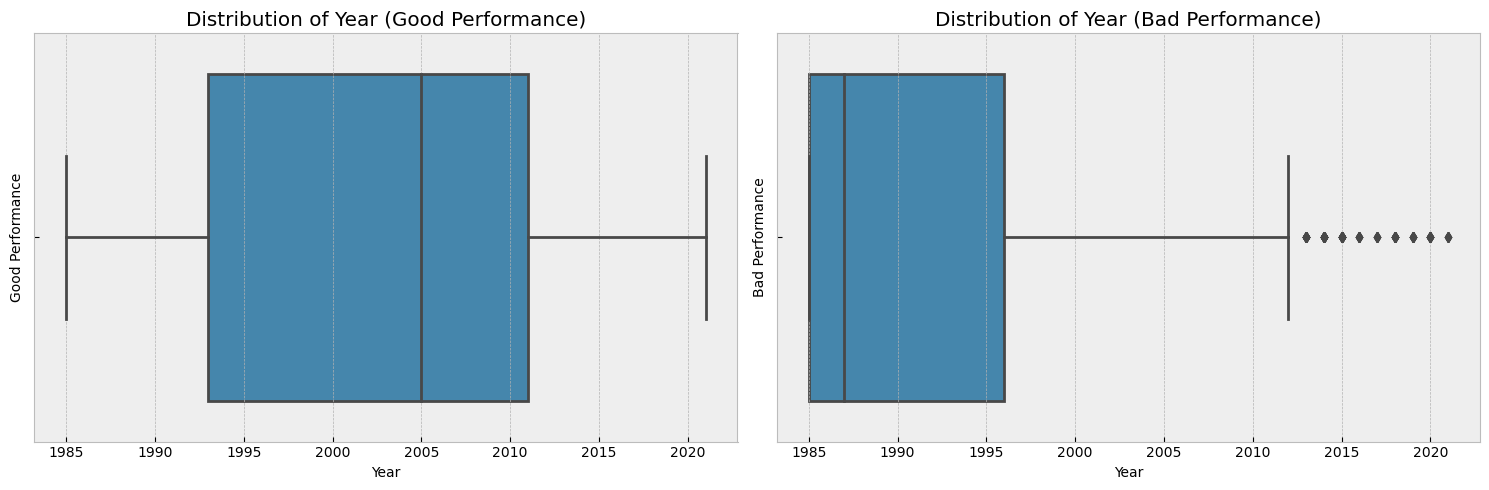

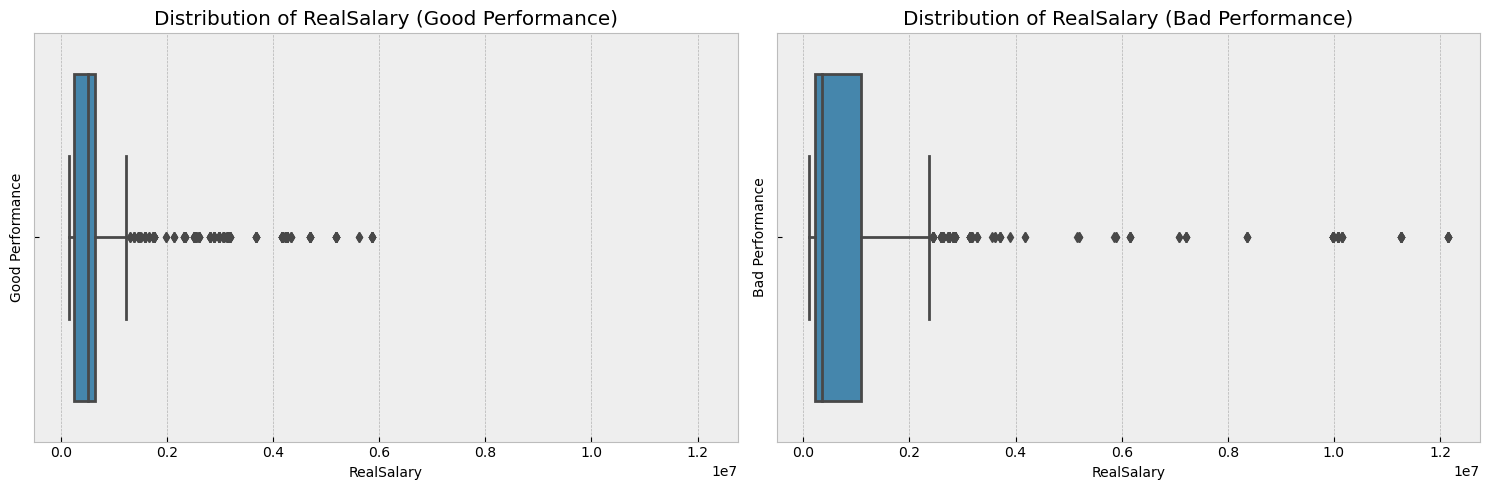

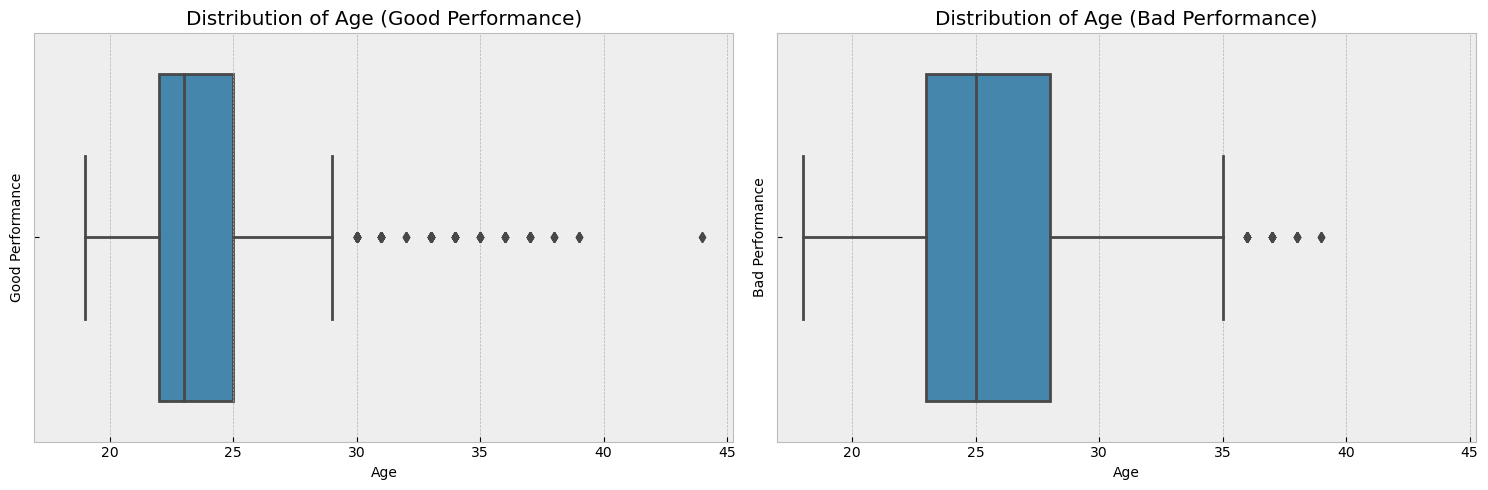

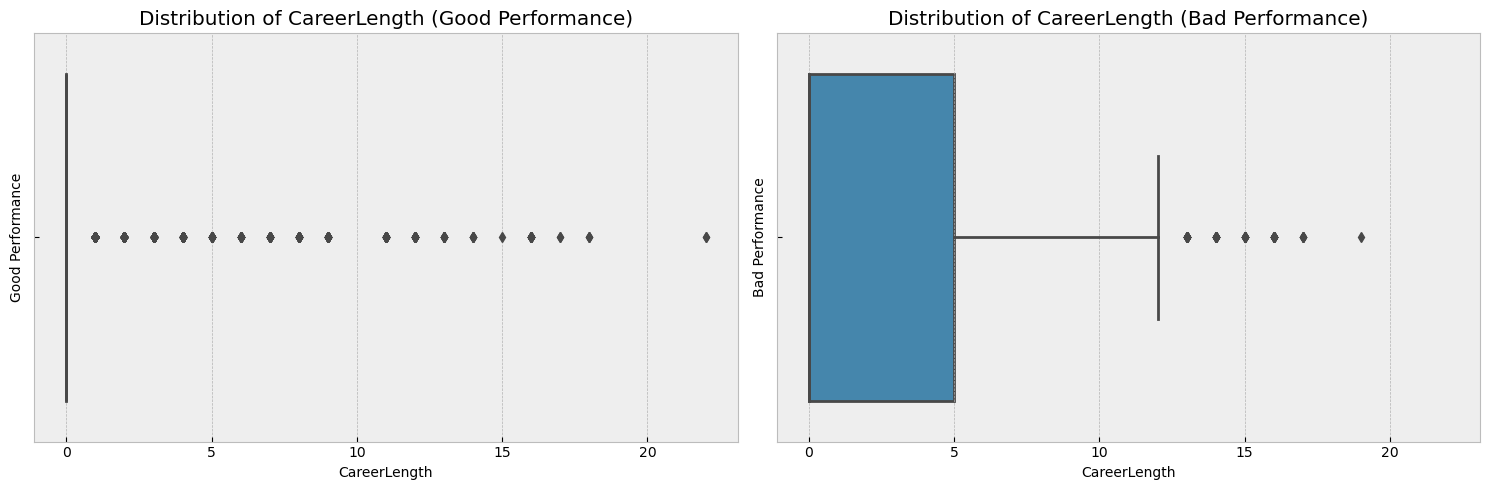

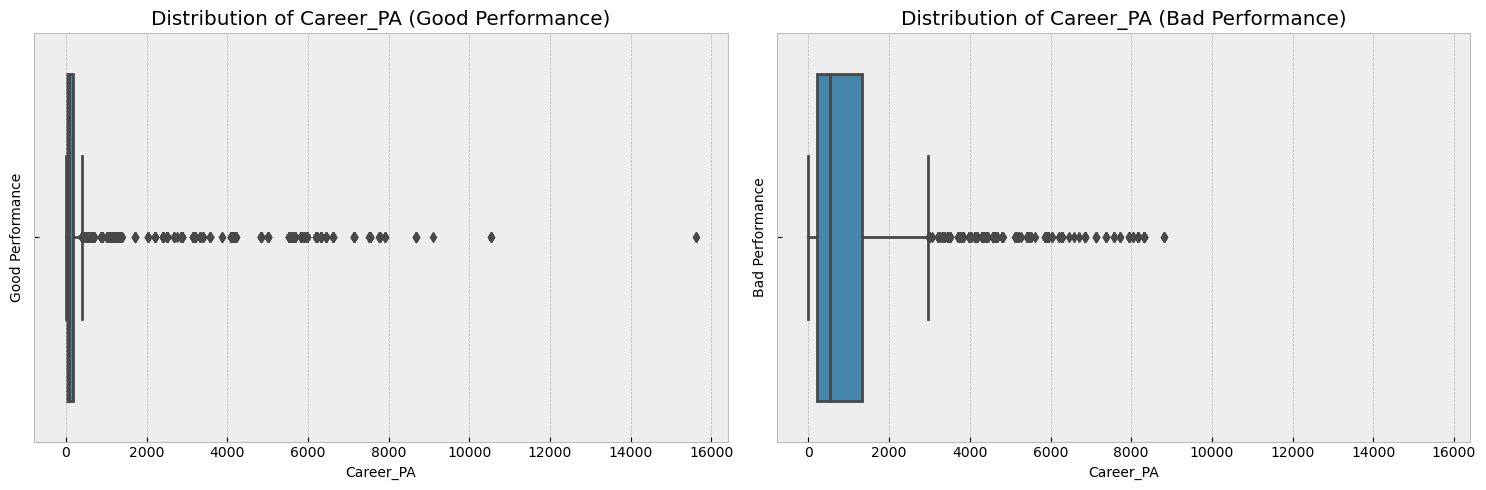

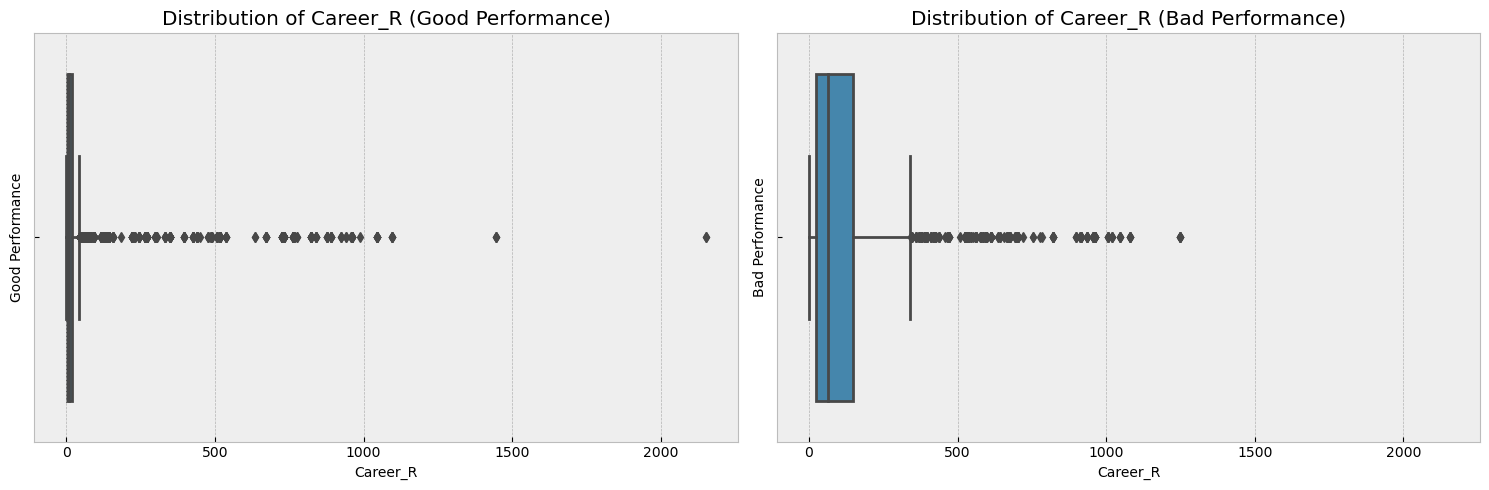

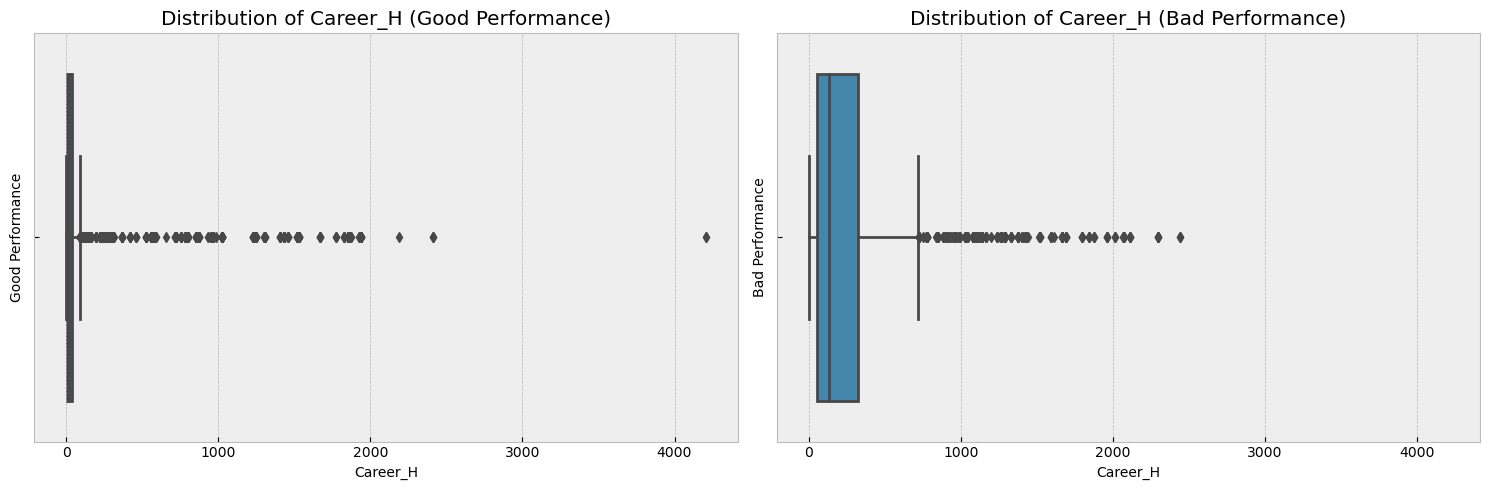

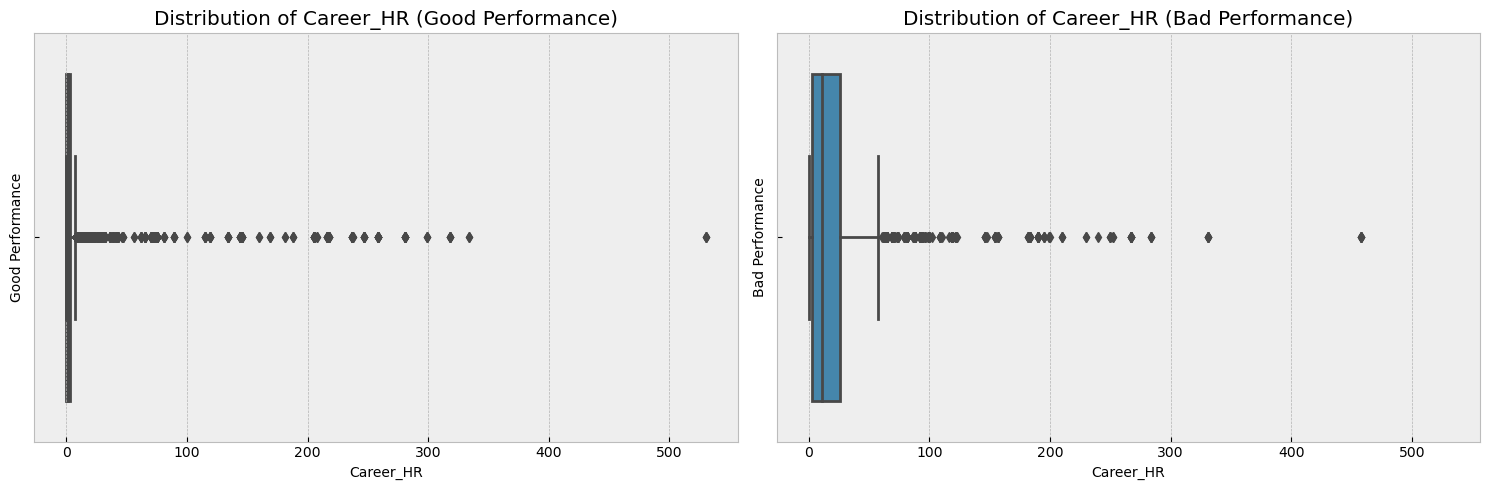

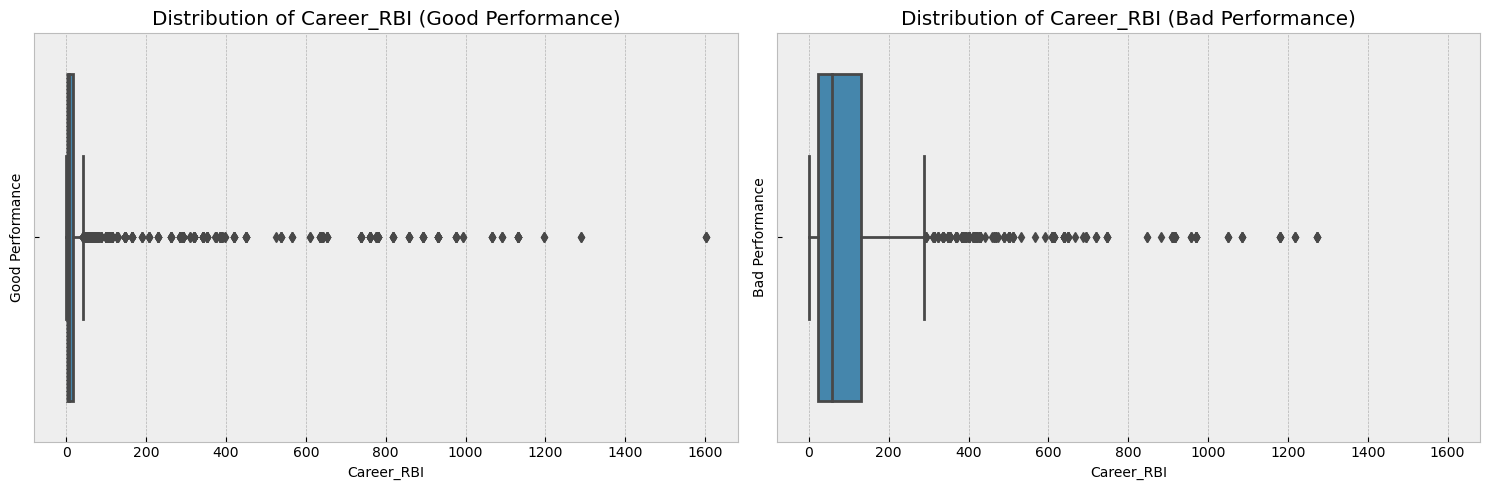

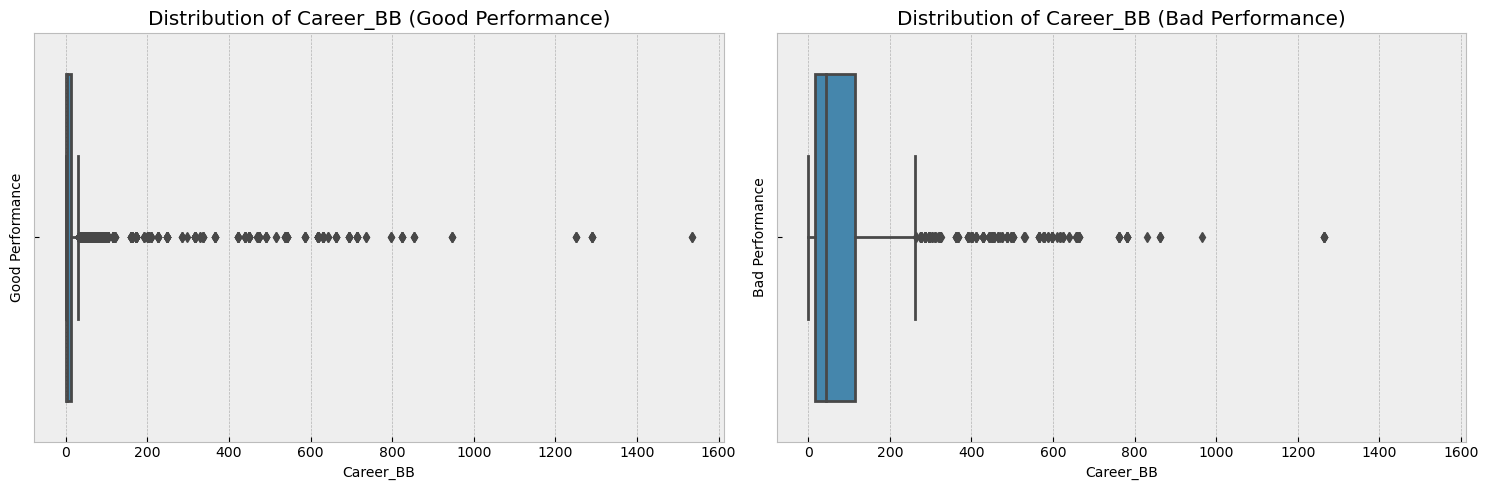

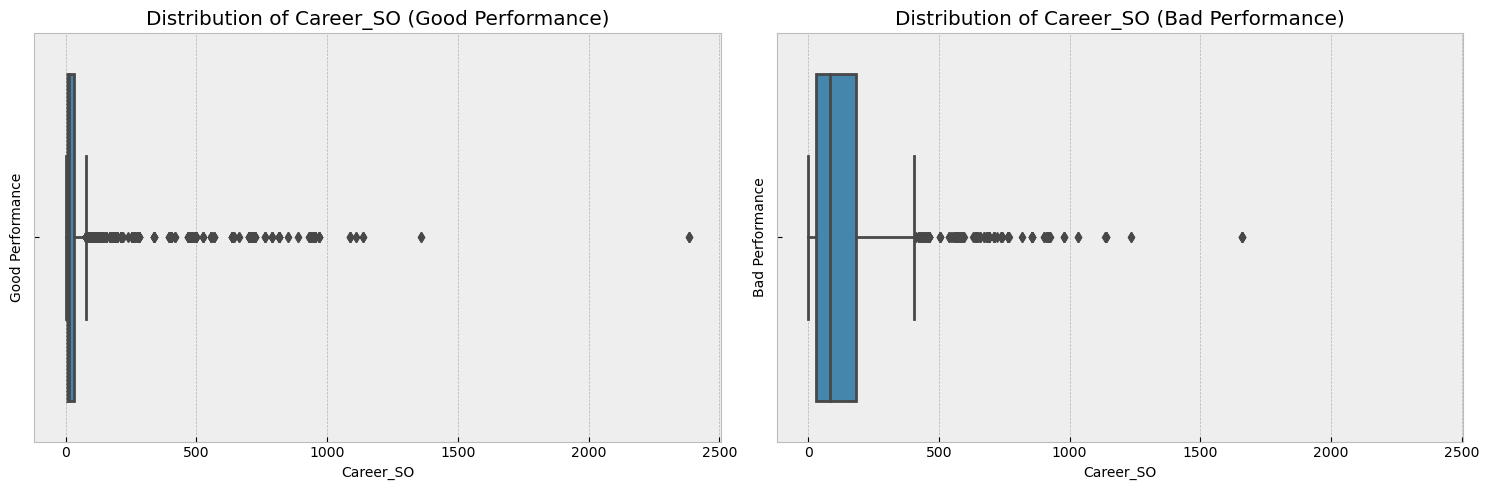

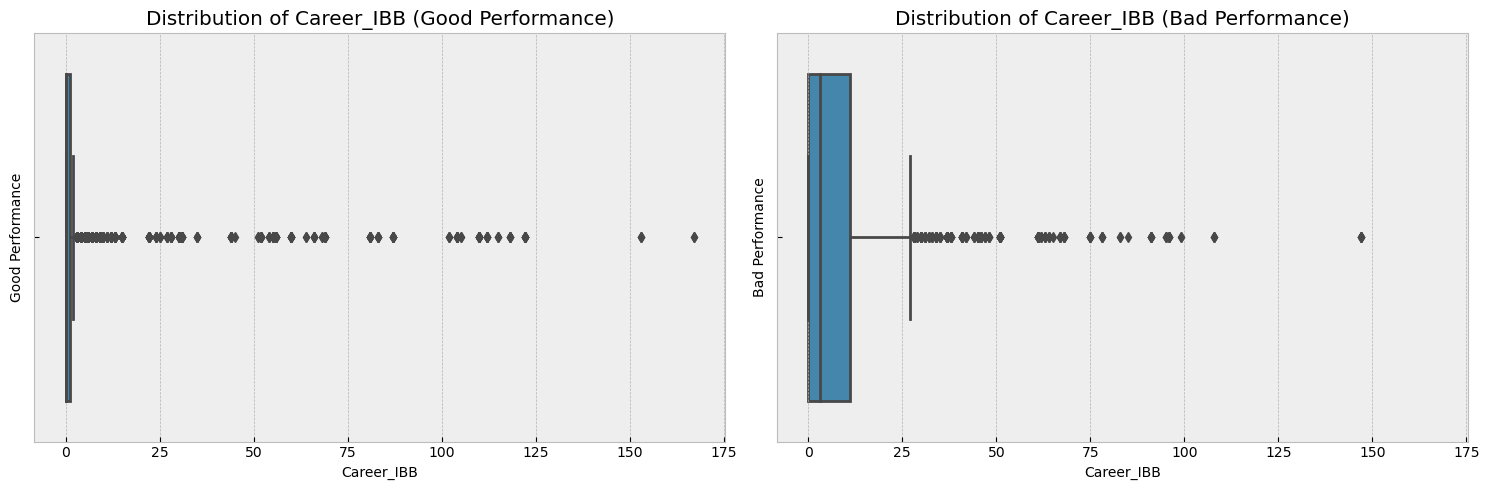

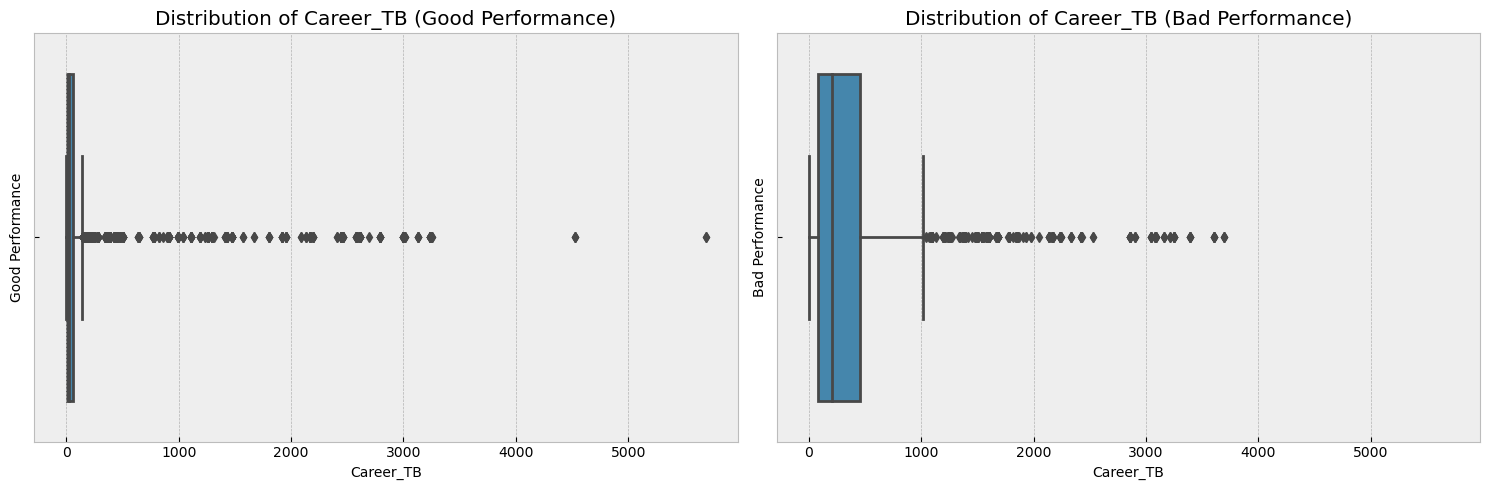

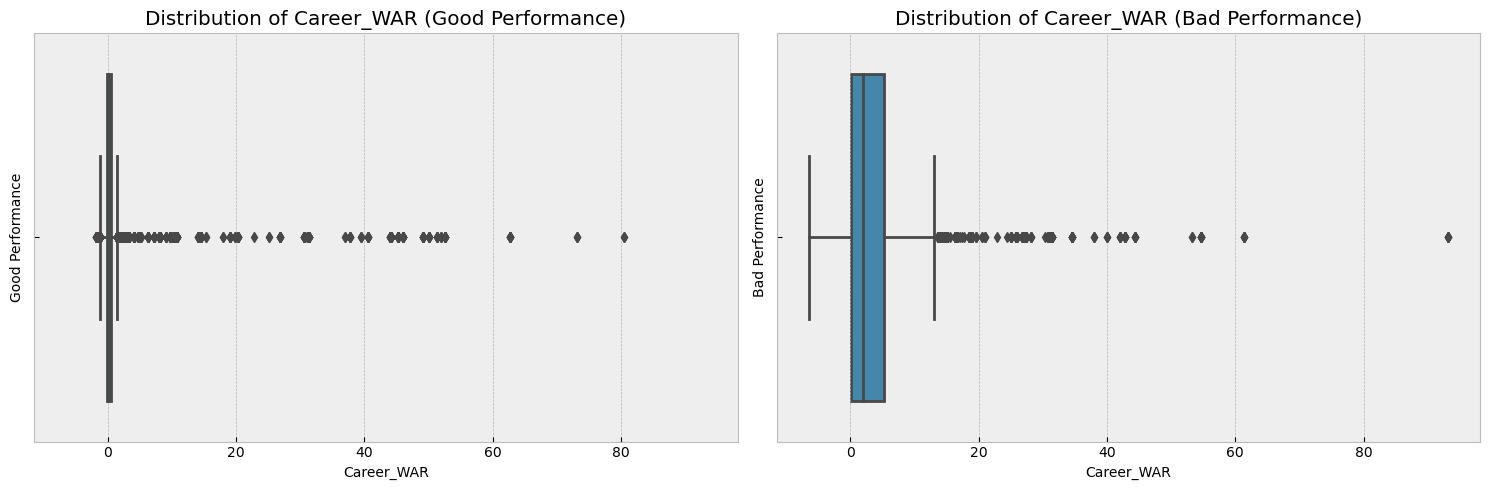

In [55]:
features = [
    'Year', 'RealSalary', 'Age', 'CareerLength', 'Career_PA', 'Career_R', 'Career_H',
       'Career_HR', 'Career_RBI', 'Career_BB', 'Career_SO', 'Career_IBB',
       'Career_TB', 'Career_WAR'
]

for feature in features:
    plt.figure(figsize=(15, 5))
    
    # Good Performance
    plt.subplot(1, 2, 1)
    sns.boxplot(x=good_performance[feature], orient='h')
    plt.title(f'Distribution of {feature} (Good Performance)')
    plt.xlabel(feature)
    plt.ylabel('Good Performance')
    x_limits_good = plt.xlim()
    
    # Bad Performance
    plt.subplot(1, 2, 2)
    sns.boxplot(x=bad_performance[feature], orient='h')
    plt.title(f'Distribution of {feature} (Bad Performance)')
    plt.xlabel(feature)
    plt.ylabel('Bad Performance')
    x_limits_bad = plt.xlim()

    # Set the same x limits for both plots
    max_x_limit = max(x_limits_good[1], x_limits_bad[1])
    min_x_limit = min(x_limits_good[0], x_limits_bad[0])
    plt.subplot(1, 2, 1)
    plt.xlim(min_x_limit, max_x_limit)
    plt.subplot(1, 2, 2)
    plt.xlim(min_x_limit, max_x_limit)
    
    plt.tight_layout()
    plt.show()

By analyzing the statistics for both good performance (error percentage < 10%) and bad performance (error percentage > 30%) subsets, we can identify some potential patterns and factors that might be driving the model's performance. Here are some insights:

- Year:

    - Good Performance: Mean Year = 2002.62, Range = 1985 to 2021.
    - Bad Performance: Mean Year = 1992.24, Range = 1985 to 2021.
    
    It seems that the model performs better with more recent data. This might be due to changes in the game, salary structures, or the availability of more accurate and representative data in recent years.

- Age and Career Length:

    - Good Performance: Mean Age = 23.57, Mean Career Length = 0.29.
    - Bad Performance: Mean Age = 25.95, Mean Career Length = 2.79.
    
    The model seems to perform better for younger players with shorter careers. This could be due to less variability and complexity in the data for these players.
- Career Statistics (e.g., Career_PA, Career_H, Career_R, Career_TB):

    - Good Performance: Generally lower mean values for career statistics.
    - Bad Performance: Generally higher mean values for career statistics.
    
    The model may struggle to accurately predict salaries for players with more extensive and varied career statistics. It could be sensitive to outliers or extreme values in these features.
- Salary:

    - Good Performance: Mean RealSalary = $501,554, Range = $157,500 to $5,862,570.
    - Bad Performance: Mean RealSalary = $999,857, Range = $104,500 to $12,150,000.
    
    The model seems to perform better for players with lower real salaries. This could be related to the influence of star players with higher salaries, which may have unique characteristics that are not well captured by the model.
- Career_WAR (Wins Above Replacement):

    - Good Performance: Mean Career_WAR = 0.86.
    - Bad Performance: Mean Career_WAR = 5.34.
    
    The model appears to perform better for players with lower Career_WAR values. This might reflect a tendency of the model to underestimate the impact of players with higher WAR values, a key metric in evaluating a player's overall contribution to their team.

#### Testing on 2022 players
We will trust the accuracy of our model and will test it on the 2022 players serves as a practical validation of its real-world applicability and relevance. By leveraging the predictions of the model, we can analyze the salary structure of players and deduce insights into whether players are being underpaid or overpaid.

In [56]:
def categorize_players_min(df_test, df_names, preprocessor=preprocessor, model=gb_grid):
    # Define a list to store the results
    results = []

    for playerID in df_test['playerID']:
        player_data = df_test[df_test['playerID'] == playerID]
        input_data = player_data.drop(['playerID'], axis=1)
        processed_data = preprocessor.transform(input_data)
        predicted_salary = model.predict(processed_data)
        predicted_salary = max(predicted_salary[0], 700000) # Minimum salary is 700,000 for the 2022 season
        real_salary_data = df_names[df_names['playerID'] == playerID]

        # Extract the required columns
        player_info = real_salary_data[['playerID', 'name_common', 'Year', 'adjusted_salary', 'age',
                                        'career_length', 'bats', 'throws', 'POS', 'teamName', 'career_PA',
                                        'Career_R', 'Career_H', 'Career_HR', 'career_RBI', 'Career_BB',
                                        'Career_SO', 'Career_IBB', 'career_TB', 'career_WAR']].values.tolist()[0]

        # Add the predicted salary and error percentage
        player_info.append(predicted_salary)
        error_percentage = round(abs(predicted_salary - player_info[3]) / player_info[3] * 100, 2)  # adjusted_salary is at index 3
        player_info.append(error_percentage)

        # Append the player's information to the results
        results.append(player_info)

    # Convert results to a DataFrame
    columns = ['PlayerID', 'Name', 'Year', 'RealSalary', 'Age', 'CareerLength', 'Bats', 'Throws', 'POS', 'TeamName', 
               'Career_PA', 'Career_R', 'Career_H', 'Career_HR', 'Career_RBI', 'Career_BB', 'Career_SO', 'Career_IBB', 
               'Career_TB', 'Career_WAR', 'PredictedSalary', 'ErrorPercentage']
    df_results = pd.DataFrame(results, columns=columns)

    return df_results

We've adjusted the previous function to account for the 2022 MLB minimum salary, which is $700,000. If the model predicts a salary lower than this threshold, the prediction will automatically be set to $700,000. This change aligns the model's output with current league regulations, ensuring that the salary predictions are not only accurate but also compliant with established standards.

In [57]:
# Load 2022 data
df_2022 = pd.read_csv('baseball_salaries_top_features_2022.csv')

In [58]:
df_2022.columns

Index(['Year', 'name_common', 'playerID', 'adjusted_salary', 'age',
       'career_length', 'bats', 'throws', 'POS', 'teamName', 'career_PA',
       'Career_R', 'Career_H', 'Career_HR', 'career_RBI', 'Career_BB',
       'Career_SO', 'Career_IBB', 'career_TB', 'career_WAR'],
      dtype='object')

In [59]:
df_test_2022 = df_2022.copy()

# Drop name_common
df_test_2022.drop(columns=['name_common'], inplace=True)

In [60]:
perf_2022_df = categorize_players_min(df_test_2022, df_2022)

c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid fe

c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hector G. Guerrero\anaconda3\envs\capstone\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid fe

In [61]:
perf_2022_df.head()

PlayerID               Name    Year  RealSalary   Age  CareerLength Bats  \
0  polloaj01         AJ Pollock  2022.0  10900000.0  34.0          10.0    R   
1  hicksaa01        Aaron Hicks  2022.0  11445000.0  32.0           9.0    B   
2  judgeaa01        Aaron Judge  2022.0  18530000.0  30.0           6.0    R   
3   toroab01       Abraham Toro  2022.0    763000.0  25.0           3.0    B   
4  mondera02  Adalberto Mondesí  2022.0   3270000.0  26.0           6.0    B   

  Throws POS            TeamName  Career_PA  Career_R  Career_H  Career_HR  \
0      R  OF   Chicago White Sox       4008       560      1010        140   
1      R  OF    New York Yankees       3276       419       648        100   
2      R  OF    New York Yankees       3161       535       748        220   
3      R  2B    Seattle Mariners        913       107       170         26   
4      R  SS  Kansas City Royals       1366       180       311         38   

   Career_RBI  Career_BB  Career_SO  Career_IBB  Career_TB  Career_WAR  \
0         470        282        704          11       1715       23.03   
1         351        413        701           8       1087       13.81   
2         497        472        908          39       1537       36.99   
3          99         65        161           1        284        0.68   
4         157         60        412           0        519        4.33   

   PredictedSalary  ErrorPercentage  
0     1.142599e+07             4.83  
1     8.332786e+06            27.19  
2     2.464676e+07            33.01  
3     7.296857e+05             4.37  
4     2.131317e+06            34.82

In [62]:
# perf_2022_df with only PlayerID, Name, RealSalary, PredictedSalary, and ErrorPercentage
perf_2022_simple = perf_2022_df[['PlayerID', 'Name', 'RealSalary', 'PredictedSalary', 'ErrorPercentage']]
perf_2022_simple['PredictedSalary'] = perf_2022_simple['PredictedSalary'].astype(int)
perf_2022_simple.head()

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_17928\3968708193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_2022_simple['PredictedSalary'] = perf_2022_simple['PredictedSalary'].astype(int)


PlayerID               Name  RealSalary  PredictedSalary  ErrorPercentage
0  polloaj01         AJ Pollock  10900000.0         11425990             4.83
1  hicksaa01        Aaron Hicks  11445000.0          8332786            27.19
2  judgeaa01        Aaron Judge  18530000.0         24646761            33.01
3   toroab01       Abraham Toro    763000.0           729685             4.37
4  mondera02  Adalberto Mondesí   3270000.0          2131316            34.82

In [63]:
def classify_value(row):
    if row['ErrorPercentage'] <= 10:
        return 'Fairly-Valued'
    elif row['PredictedSalary'] > row['RealSalary']:
        return 'Under-Valued'
    else:
        return 'Over-Valued'

In [64]:
perf_2022_simple['Value'] = perf_2022_simple.apply(classify_value, axis=1)

C:\Users\Hector G. Guerrero\AppData\Local\Temp\ipykernel_17928\521056301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_2022_simple['Value'] = perf_2022_simple.apply(classify_value, axis=1)


In [72]:
perf_2022_simple.sample(5)

PlayerID               Name  RealSalary  PredictedSalary  \
62   stottbr01       Bryson Stott    763000.0           749370   
72   biggica01       Cavan Biggio   2313525.0          1161575   
304  hoernni01       Nico Hoerner    763000.0           857249   
143  stantmi03  Giancarlo Stanton  31610000.0         29516857   
146  torregl01     Gleyber Torres   6812500.0          5516420   

     ErrorPercentage          Value  
62              1.79  Fairly-Valued  
72             49.79    Over-Valued  
304            12.35   Under-Valued  
143             6.62  Fairly-Valued  
146            19.03    Over-Valued

In [66]:
# Function to check a player's value
def check_value(player):
    return perf_2022_simple[perf_2022_simple['Name'] == player]
    

In [67]:
check_value('Aaron Judge')

PlayerID         Name  RealSalary  PredictedSalary  ErrorPercentage  \
2  judgeaa01  Aaron Judge  18530000.0         24646761            33.01   

          Value  
2  Under-Valued

## 7. Conclusion <a id='conclusion'></a>

In this notebook, we explored various regression models to predict baseball player salaries using features such as career statistics and team affiliations. The models included linear regression, ridge regression, lasso regression, decision tree, random forest, and gradient boosting regressor. The gradient boosting regressor emerged as the best model with the lowest RMSE and highest R^2 values, indicating its superior predictive performance. Feature importance analysis revealed 'career_WAR', 'Career_HR', and 'career_TB' as the most influential features. The residuals were inspected for normality and homoscedasticity using plots and QQ plots, helping to verify the model's assumptions and reliability. 

#### Gradient Boosting Regressor Behavior (Best Model)

1. __Overall Performance__: The R^2 value of 0.747 indicates that the model is able to explain approximately 74.72% of the variation in players' salaries. This suggests a good fit overall.
2. __Error Magnitude__: The RMSE value of 2,628,207 is a measure of the average error in the predictions. Given that the mean salary is approximately 2,928,191 and the standard deviation is 5,158,169, the RMSE is substantial but still within a reasonable range considering the wide distribution of salaries.
3. __Performance Across Salary Ranges__:
    - __Lower Salary Players__: The model likely performs better for players in the lower to middle salary range. These players usually follow more common salary patterns, and their salaries may be more strongly tied to measurable performance metrics.
    - __Higher Salary Players (Superstars)__: The model may struggle more with players who have very high salaries. These "superstar" players often have salaries influenced by factors beyond on-field performance, such as marketability and popularity. The wider spread of residuals for higher salaries in the plot indicates this challenge.

##### Potential Improvements
Considering additional features or different modeling techniques that capture the unique characteristics of higher-earning players could lead to further improvements in predictive accuracy.

In conclusion, the model seems to be performing reasonably well overall but may benefit from further refinement, especially in predicting the salaries of higher-earning players.

---
---
---

In [68]:
# dataframe with salaries bellow 800000
# df_minimun = df_2022_names[df_2022_names['adjusted_salary'] < 800000]

In [69]:
# def compare_salary(playerID, df_test=df_2022, df_names=df_2022_names, preprocessor=preprocessor, model=gb_grid):
#     # Find the row for the given playerID in df_2022
#     player_data = df_test[df_test['playerID'] == playerID]
    
#     if player_data.empty:
#         return "Player ID not found in the input dataset"
    
#     # Extract the required features
#     input_data = player_data.drop(['playerID'], axis=1)  # Assuming playerID is in the DataFrame
    
#     # Apply preprocessing (scaling, encoding, etc.)
#     processed_data = preprocessor.transform(input_data)

#     # Make the prediction
#     predicted_salary = model.predict(processed_data)
    
#     # Apply minumum salary threshold
#     predicted_salary = max(predicted_salary[0], 700000)

#     # Find the real salary from df_real
#     real_salary_data = df_names[df_names['playerID'] == playerID]
    
#     if real_salary_data.empty:
#         return f"Predicted Salary for Player {playerID}: ${predicted_salary[0]}. Real salary data not found."
    
#     real_salary = real_salary_data['adjusted_salary'].values[0]  # Assuming the column name for real salary is 'adjusted_salary'
#     player_name = real_salary_data['name_common'].values[0]

#     return f"Predicted Salary for Player {player_name}: ${round(predicted_salary, 2)}. Real Salary: ${real_salary}. Difference: ${round(predicted_salary - real_salary, 2)}. Error Percentage: {round(abs(predicted_salary - real_salary) / real_salary * 100, 2)}%."
